# Machine Learning Model on predicting Thyroid Recurrence
## About Dataset
#### Created by Jania
##### Database Link: https://www.kaggle.com/datasets/jainaru/thyroid-disease-data

1. Age: The age of the patient at the time of diagnosis or treatment
2. Gender: The gender of the patient (male or female)
3. Smoking: Whether the patient is a smoker or not
4. Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked)
5. Hx Radiotherapy: History of radiotherapy treatment for any condition.
6. Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
7. Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
8. Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
9. Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
10. Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
11. Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
12. T: Tumor classification based on its size and extent of invasion into nearby structures.
13. N: Nodal classification indicating the involvement of lymph nodes.
14. M: Metastasis classification indicating the presence or absence of distant metastases.
15. Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
16. Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.17.
17. Recurred: Indicates whether the cancer has recurred after initial treatment.

In [157]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

In [159]:
df = pd.read_csv("Thyroid_Diff.csv")

In [161]:


data = load_breast_cancer()
X = data.data
y = data.target # Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Data Cleaning

In [166]:
# Changing all the categorical data into numbers
df = df.replace({'Yes': 1, 'No': 0})
# Replace all the adenopathy values first since they utilize no
df['Adenopathy'] = df['Adenopathy'].replace({'No': 0, 'Right': 1, 'Left': 2, 'Posterior': 3, 'Bilateral': 4, 'Extensive': 5})
# General Replacement
df['Gender'] = df['Gender'].replace({'M': 1, 'F': 0})

# Specific Replacement

# Nominal Data
df['Thyroid Function'] = df['Thyroid Function'].replace({'Euthyroid': 0, 'Clinical Hyperthyroidism': 1, 'Subclinical Hyperthyroidism': 2, 'Clinical Hypothyroidism': 3, 'Subclinical Hypothyroidism': 4})
df['Physical Examination'] = df['Physical Examination'].replace({'Single nodular goiter-left': 0, 'Multinodular goiter': 1, 'Single nodular goiter-right': 2, 'Normal': 3, 'Diffuse goiter': 4})
df['Pathology'] = df['Pathology'].replace({'Micropapillary': 0, 'Follicular': 1, 'Papillary': 2, 'Hurthel cell': 3})
df['Focality'] = df['Focality'].replace({'Uni-Focal': 0, 'Multi-Focal': 1})

# Ordinal Data
df['Response'] = df['Response'].replace({'Indeterminate': 0, 'Structural Incomplete': 1, 'Biochemical Incomplete': 2, 'Biochemical': 3, 'Structural': 4, 'Excellent': 5})
df['Risk'] = df['Risk'].replace({'Low': 0, 'Intermediate': 1, 'High': 2})
df['Stage'] = df['Stage'].replace({'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4})
df['T'] = df['T'].replace({'T1a': 0, 'T1b': 1, 'N1a': 2, 'N1b': 3, 'T2': 4, 'T3a': 5, 'T3b': 6, 'T4a': 7, 'T4b': 8})
df['M'] = df['M'].replace({'M0': 0, 'M1': 1})
df['N'] = df['N'].replace({'N0': 0, 'N1a': 1, 'N1b': 2})

In [168]:
# Labeling data types
df = df.astype('int64')
df['Age'] = df['Age'].astype('int64')

# Renaming data
df.rename({'Recurred':'Outcome'}, axis=1, inplace=True)
df.rename({'Response':'Patient Response'}, axis=1, inplace=True)

In [170]:
# Labels
df = df.astype('int64')
df.rename({'Recurred':'Outcome'}, axis=1, inplace=True)
df['Outcome'] = df['Outcome'].astype('category')

In [172]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Patient Response,Outcome
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,0,0,1,0,0,1,0,0,0,0,0,0,0,0,5,0
2,30,0,0,0,0,0,2,0,0,0,0,0,0,0,0,5,0
3,62,0,0,0,0,0,2,0,0,0,0,0,0,0,0,5,0
4,62,0,0,0,0,0,1,0,0,1,0,0,0,0,0,5,0


In [175]:
df.corr()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Patient Response,Outcome
Age,1.000000,0.186457,0.309536,0.134531,0.176588,0.051722,-0.093102,0.127511,-0.063155,0.223847,0.295556,0.182651,0.061243,0.235401,0.526862,-0.238226,0.258897
Gender,0.186457,1.000000,0.621886,0.175755,0.235865,0.053194,-0.158805,0.305191,0.083847,0.207634,0.295229,0.237453,0.238766,0.211540,0.250215,-0.241528,0.328189
Smoking,0.309536,0.621886,1.000000,0.252773,0.297874,0.020045,-0.185286,0.273971,0.087311,0.238494,0.374324,0.314260,0.204305,0.321233,0.426152,-0.242380,0.333243
Hx Smoking,0.134531,0.175755,0.252773,1.000000,0.261198,0.119171,0.042029,0.127557,0.008136,0.001204,0.138403,0.096251,0.044421,0.127209,0.262371,-0.056272,0.136073
Hx Radiothreapy,0.176588,0.235865,0.297874,0.261198,1.000000,-0.004802,-0.034578,0.169910,0.023613,0.102415,0.272056,0.160839,0.095535,0.430214,0.461901,-0.086343,0.174407
Thyroid Function,0.051722,0.053194,0.020045,0.119171,-0.004802,1.000000,0.065105,0.040728,-0.022108,0.050773,0.035399,0.000610,0.005700,-0.009705,0.066615,-0.005110,-0.033610
Physical Examination,-0.093102,-0.158805,-0.185286,0.042029,-0.034578,0.065105,1.000000,-0.124601,-0.073899,-0.194202,-0.129697,-0.168753,-0.078105,-0.139820,-0.094945,0.154677,-0.119520
Adenopathy,0.127511,0.305191,0.273971,0.127557,0.169910,0.040728,-0.124601,1.000000,0.212298,0.378697,0.612227,0.415122,0.751239,0.209229,0.312600,-0.421041,0.586010
Pathology,-0.063155,0.083847,0.087311,0.008136,0.023613,-0.022108,-0.073899,0.212298,1.000000,0.219614,0.202660,0.613919,0.247919,-0.001863,0.060261,-0.213234,0.182032
Focality,0.223847,0.207634,0.238494,0.001204,0.102415,0.050773,-0.194202,0.378697,0.219614,1.000000,0.450615,0.391920,0.376692,0.221931,0.331892,-0.330174,0.383776


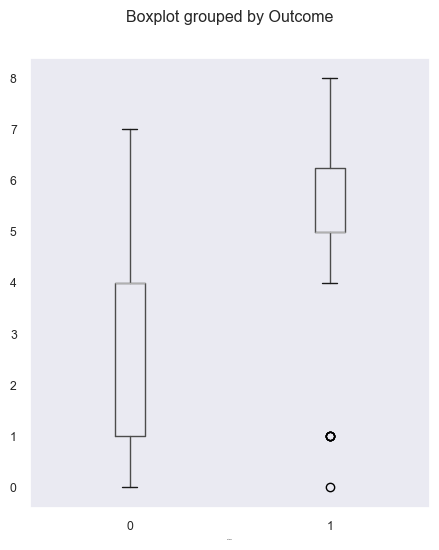

In [182]:
ttest_boxplot = df.boxplot(column='T', by='Outcome', figsize=(5, 6), grid=False);
ttest_boxplot.set_title('');
ttest_boxplot.set_ylabel('');

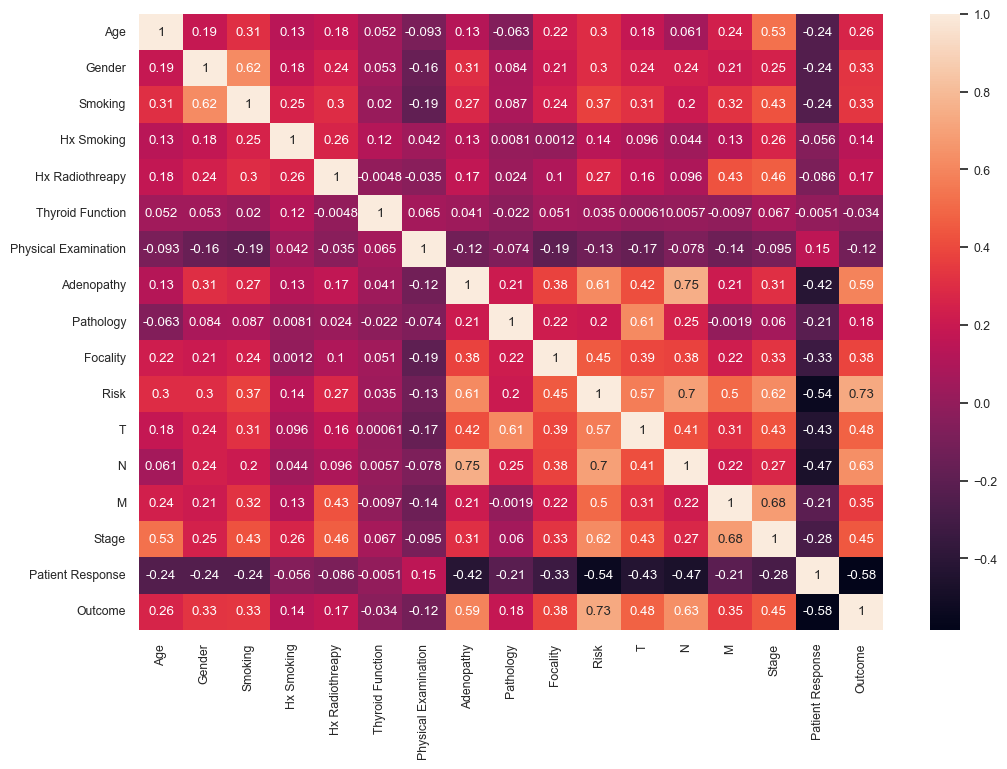

In [179]:
# Pearson's correlation (with heatmap)
plt.figure(figsize=(12,8))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(), annot=True);

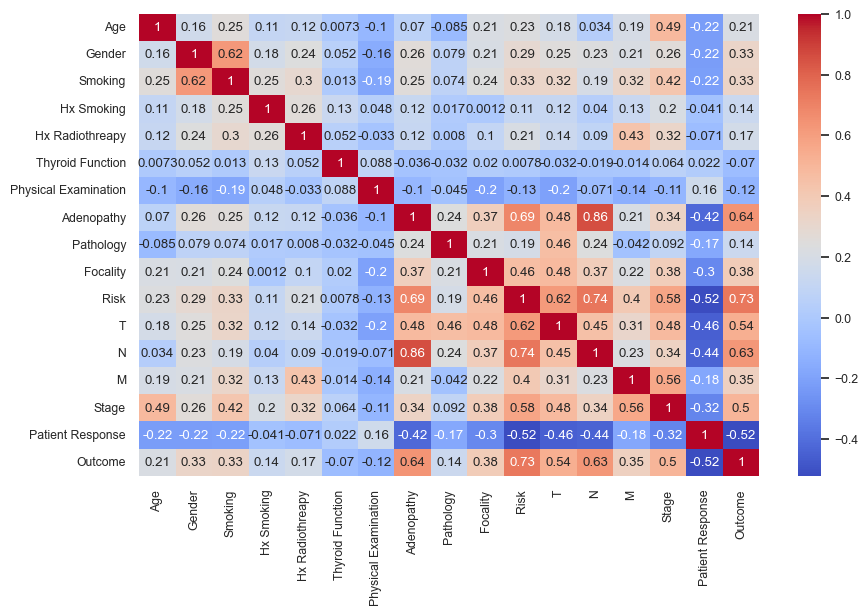

In [16]:
# Spearman's Rank or Spearman's Rho correlation
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(method='spearman'), annot=True, cmap="coolwarm"); # nonparametric correlation

In [17]:
# Phi K correlations for all variables
import phik
from phik import resources, report

In [18]:
df.phik_matrix()

interval columns not set, guessing: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Patient Response']


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Patient Response,Outcome
Age,1.000000,0.187444,0.450226,0.140800,0.365998,0.077321,0.000000,0.087727,0.164039,0.261631,0.370772,0.309218,0.000000,0.415841,0.686242,0.289578,0.436874
Gender,0.187444,1.000000,0.818591,0.240813,0.316130,0.021072,0.110761,0.414983,0.077706,0.300418,0.174422,0.282910,0.143454,0.292725,0.203754,0.456143,0.477676
Smoking,0.450226,0.818591,1.000000,0.357158,0.403106,0.000000,0.130019,0.365690,0.377523,0.345941,0.249921,0.410488,0.127795,0.452328,0.371037,0.491646,0.483032
Hx Smoking,0.140800,0.240813,0.357158,1.000000,0.335975,0.082703,0.000000,0.183110,0.136752,0.000000,0.093268,0.221329,0.000000,0.141118,0.271234,0.193033,0.178347
Hx Radiothreapy,0.365998,0.316130,0.403106,0.335975,1.000000,0.086172,0.000000,0.561132,0.149384,0.100800,0.229946,0.379826,0.047117,0.563704,0.401071,0.216787,0.224477
Thyroid Function,0.077321,0.021072,0.000000,0.082703,0.086172,1.000000,0.520010,0.000000,0.064984,0.000000,0.062957,0.135102,0.151195,0.000000,0.353511,0.000000,0.044988
Physical Examination,0.000000,0.110761,0.130019,0.000000,0.000000,0.520010,1.000000,0.306528,0.103148,0.290635,0.194845,0.177764,0.136868,0.090133,0.000000,0.114829,0.125797
Adenopathy,0.087727,0.414983,0.365690,0.183110,0.561132,0.000000,0.306528,1.000000,0.175151,0.521045,0.835649,0.444793,0.902421,0.358829,0.305984,0.535318,0.829297
Pathology,0.164039,0.077706,0.377523,0.136752,0.149384,0.064984,0.103148,0.175151,1.000000,0.351919,0.187675,0.700371,0.214309,0.258138,0.155983,0.403885,0.345766
Focality,0.261631,0.300418,0.345941,0.000000,0.100800,0.000000,0.290635,0.521045,0.351919,1.000000,0.281170,0.492488,0.227140,0.313444,0.301647,0.601096,0.555220


In [19]:
from phik.report import plot_correlation_matrix
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Patient Response']


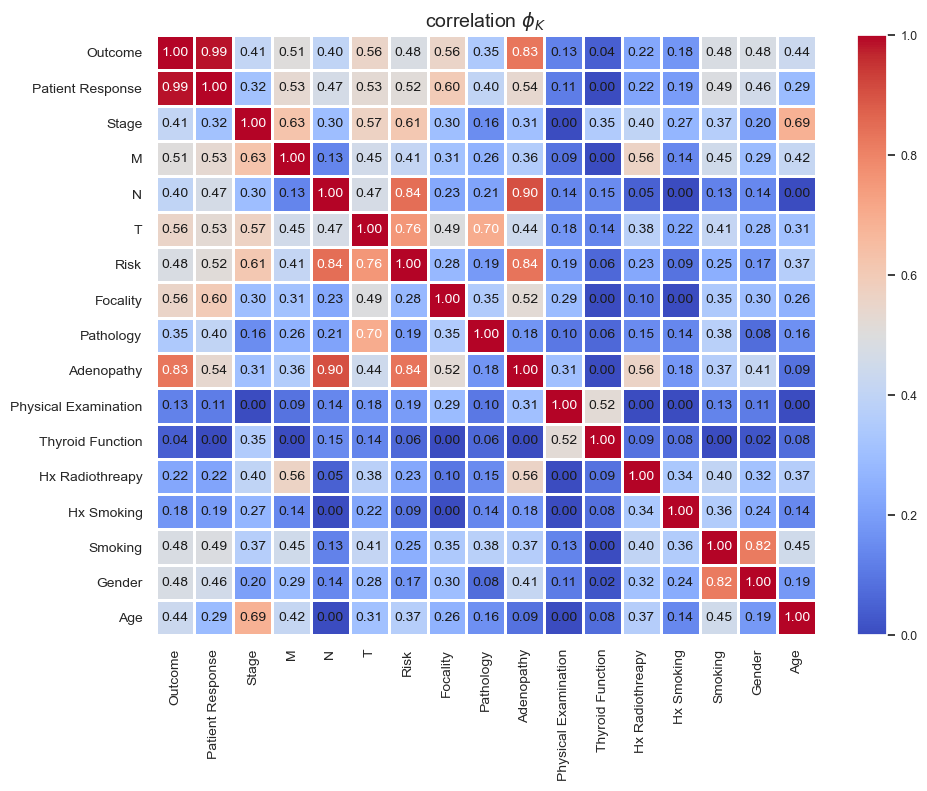

In [20]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.0, 
                        figsize=(10, 8))
plt.tight_layout()

# Unsually High Correlations

The Phi-K correlation shows that the correlation between response and outcome is signficantly high at 0.99 which indicates that they are far too correlated. Because of this the model should remove 'patient response' due to it may being a far too great predicting factor.

In [23]:
df = df.drop('Patient Response', axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   383 non-null    int64   
 1   Gender                383 non-null    int64   
 2   Smoking               383 non-null    int64   
 3   Hx Smoking            383 non-null    int64   
 4   Hx Radiothreapy       383 non-null    int64   
 5   Thyroid Function      383 non-null    int64   
 6   Physical Examination  383 non-null    int64   
 7   Adenopathy            383 non-null    int64   
 8   Pathology             383 non-null    int64   
 9   Focality              383 non-null    int64   
 10  Risk                  383 non-null    int64   
 11  T                     383 non-null    int64   
 12  N                     383 non-null    int64   
 13  M                     383 non-null    int64   
 14  Stage                 383 non-null    int64   
 15  Outcom

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0
Gender,383.0,0.185379,0.389113,0.0,0.0,0.0,0.0,1.0
Smoking,383.0,0.127937,0.334457,0.0,0.0,0.0,0.0,1.0
Hx Smoking,383.0,0.073107,0.260653,0.0,0.0,0.0,0.0,1.0
Hx Radiothreapy,383.0,0.018277,0.134126,0.0,0.0,0.0,0.0,1.0
Thyroid Function,383.0,0.318538,0.933858,0.0,0.0,0.0,0.0,4.0
Physical Examination,383.0,1.224543,0.887212,0.0,1.0,1.0,2.0,4.0
Adenopathy,383.0,0.655352,1.310955,0.0,0.0,0.0,1.0,5.0
Pathology,383.0,1.728460,0.744543,0.0,2.0,2.0,2.0,3.0
Focality,383.0,0.355091,0.479167,0.0,0.0,0.0,1.0,1.0


In [26]:
df[df.duplicated()].count()

Age                     26
Gender                  26
Smoking                 26
Hx Smoking              26
Hx Radiothreapy         26
Thyroid Function        26
Physical Examination    26
Adenopathy              26
Pathology               26
Focality                26
Risk                    26
T                       26
N                       26
M                       26
Stage                   26
Outcome                 26
dtype: int64

## Outlier Code
##### Because most of the variables are nominal or ordinal this only applies to the age

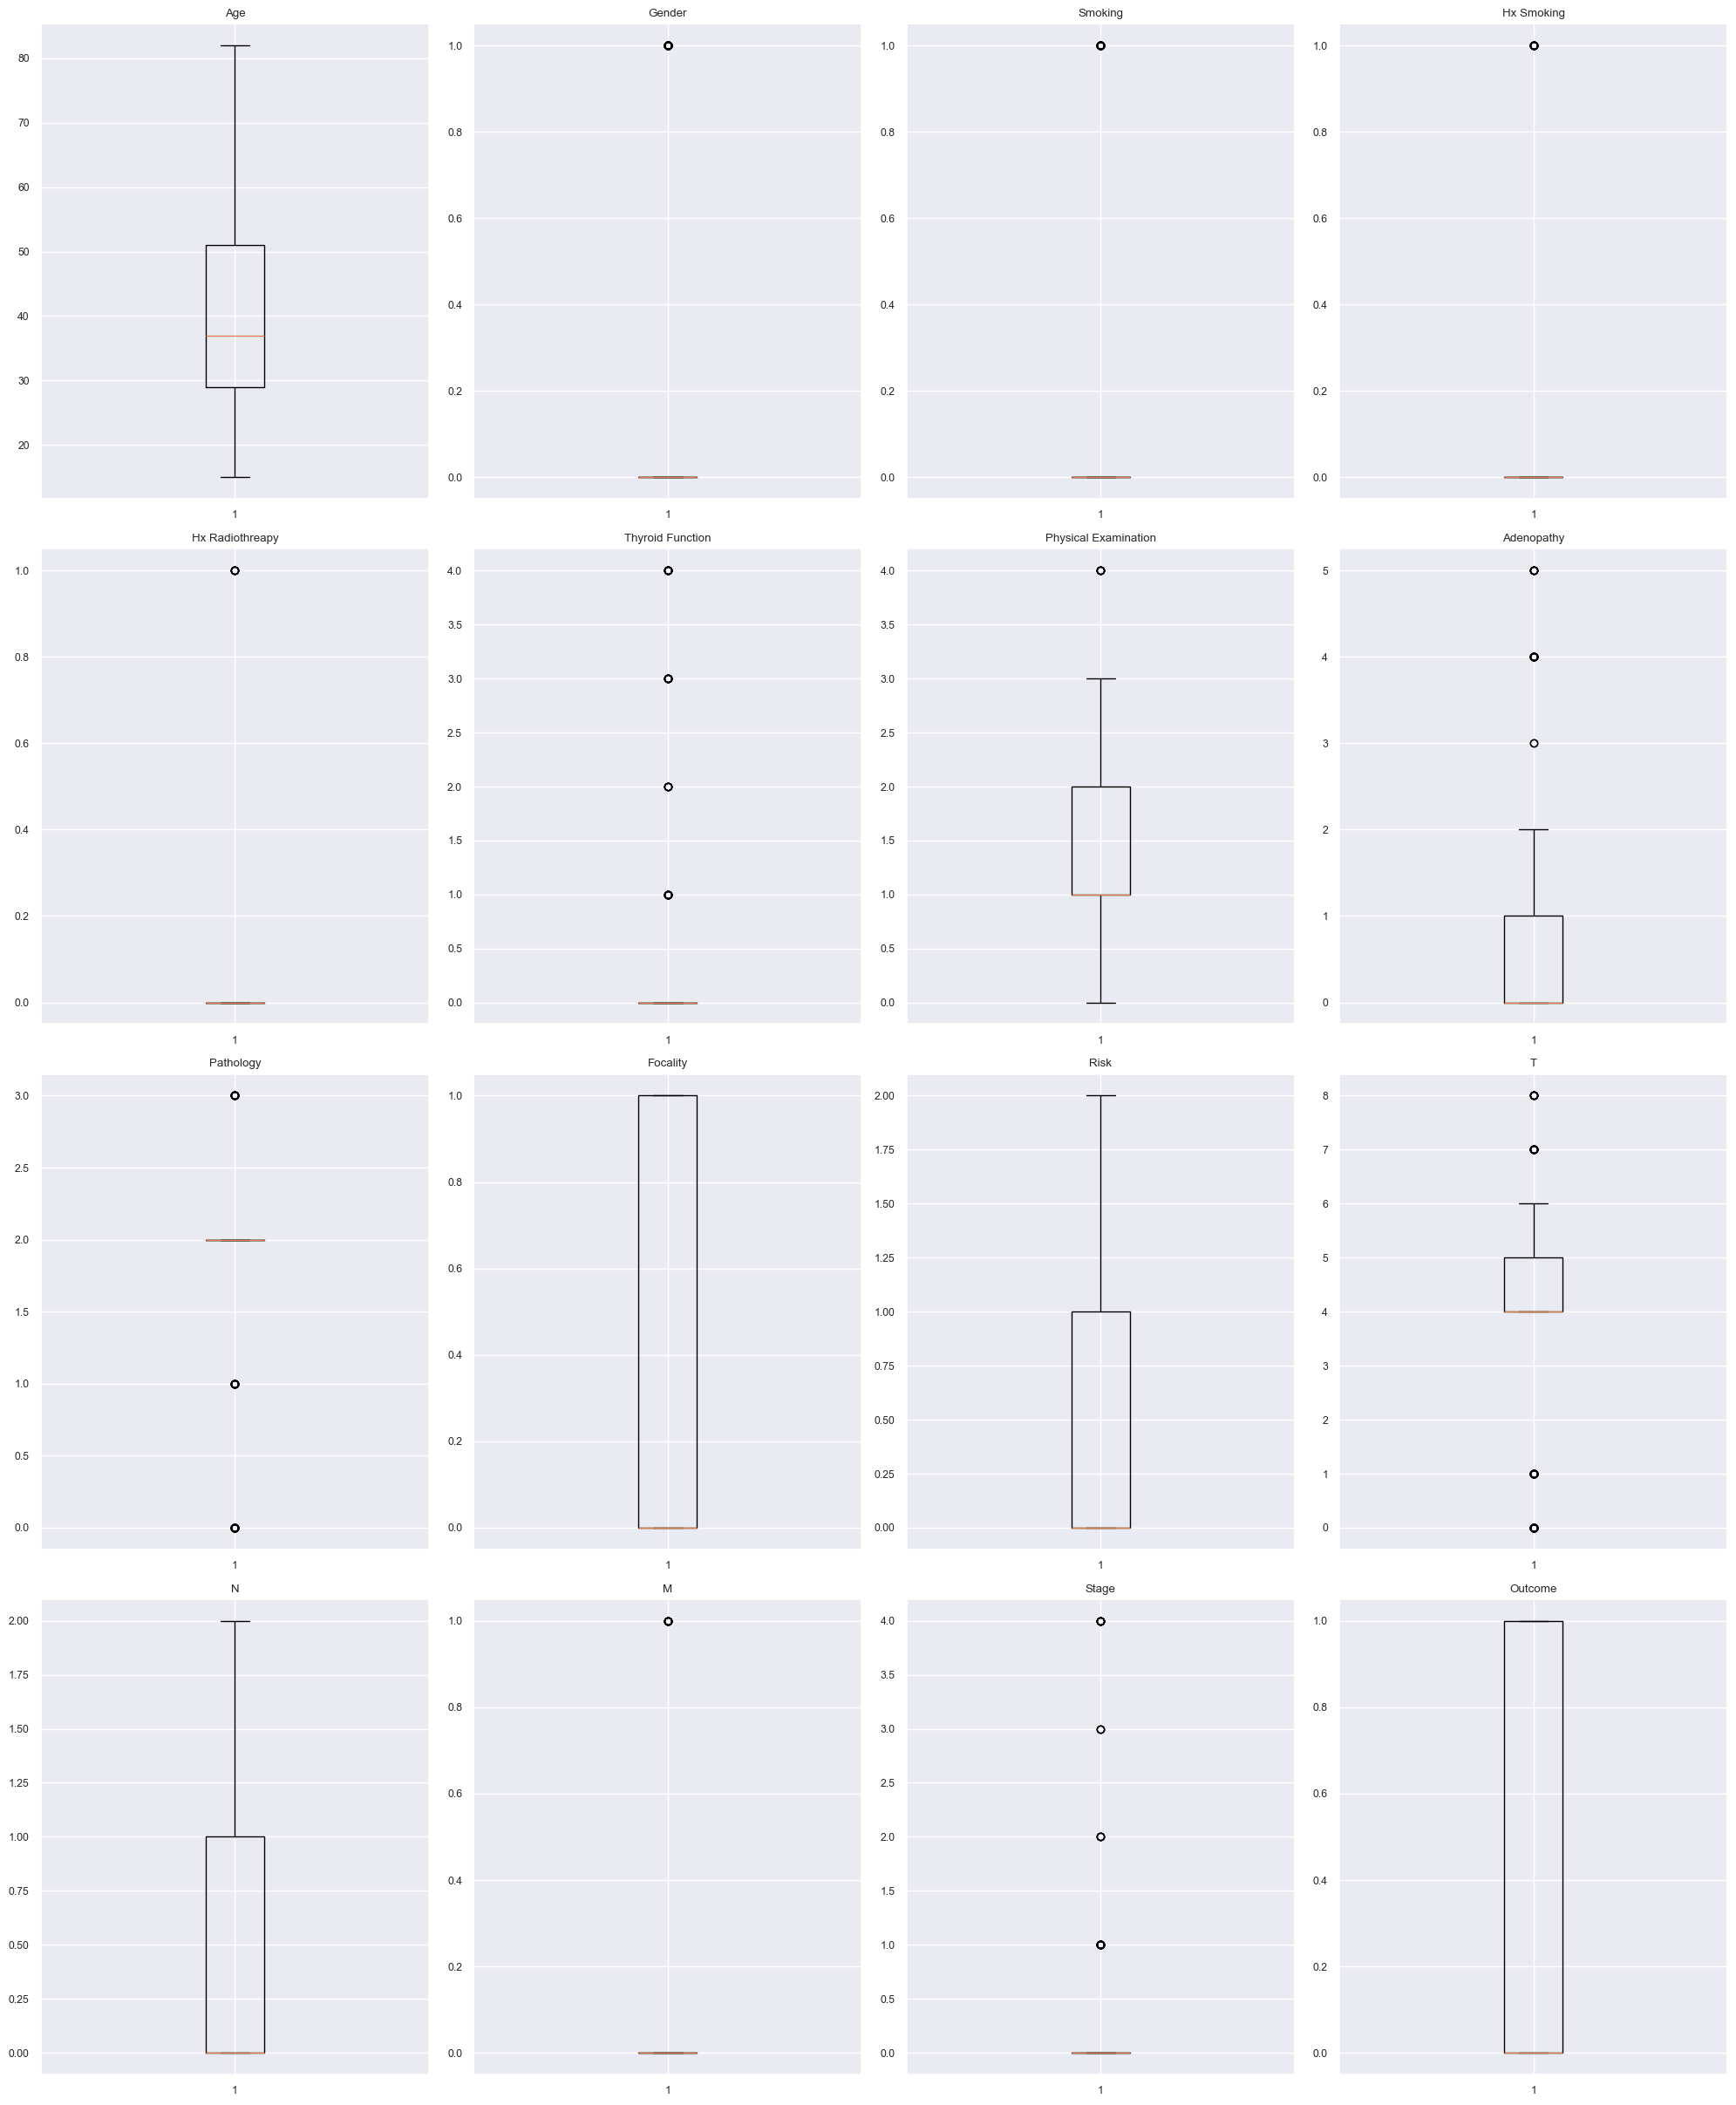

In [28]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(df):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

In [29]:
def treat_outliers(df,col):
    Q1=df[col].quantile(0.25) 
    Q3=df[col].quantile(0.75) 
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)                                                            
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df,c)
    return df

In [30]:
 numerical_col = df.select_dtypes(include=np.number).columns.tolist()
# df = treat_outliers_all(df,numerical_col)

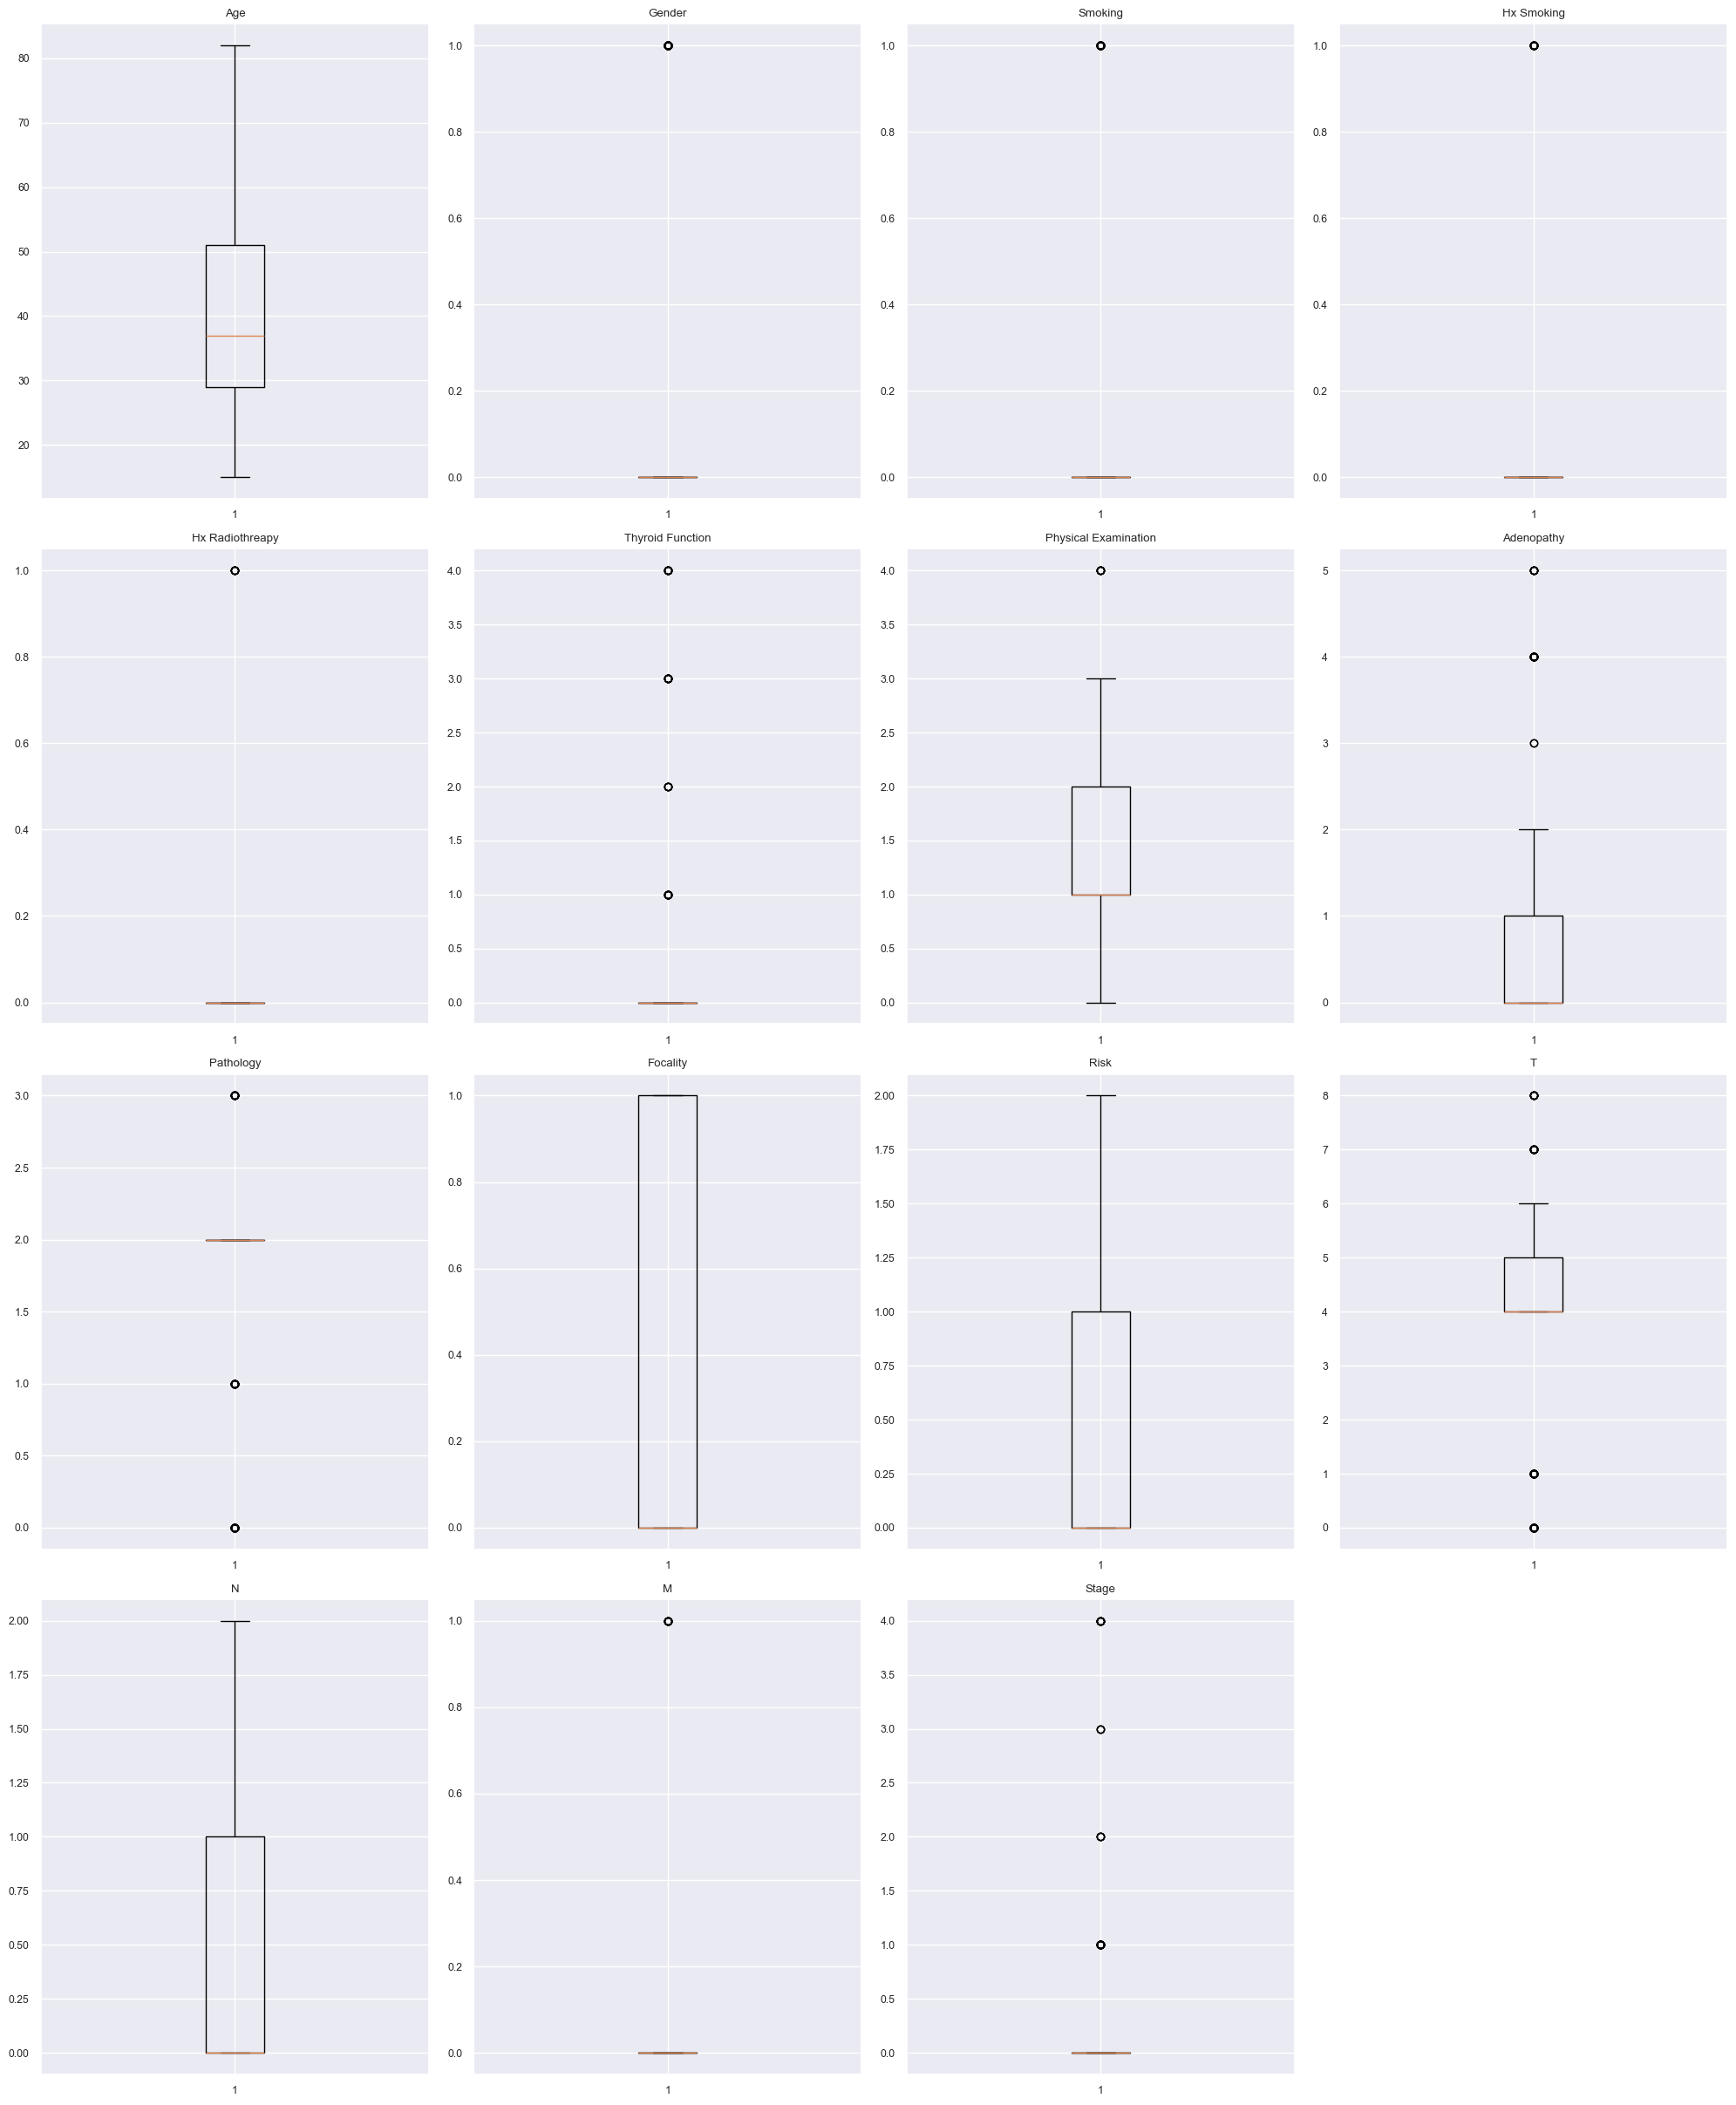

In [31]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Supervised Learning

In [33]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import stats, norm, skew
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets

In [34]:
# Make copy of data
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   383 non-null    int64   
 1   Gender                383 non-null    int64   
 2   Smoking               383 non-null    int64   
 3   Hx Smoking            383 non-null    int64   
 4   Hx Radiothreapy       383 non-null    int64   
 5   Thyroid Function      383 non-null    int64   
 6   Physical Examination  383 non-null    int64   
 7   Adenopathy            383 non-null    int64   
 8   Pathology             383 non-null    int64   
 9   Focality              383 non-null    int64   
 10  Risk                  383 non-null    int64   
 11  T                     383 non-null    int64   
 12  N                     383 non-null    int64   
 13  M                     383 non-null    int64   
 14  Stage                 383 non-null    int64   
 15  Outcom

### Splitting Data into Train and Test Sets

In [36]:
X = data.drop('Outcome',axis=1)    # Features
y = data['Outcome'].astype('int64') # Labels (Target or Outcome Variable)
# converting target to integers - since some functions might not work with bool type


In [44]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape)

(256, 15) (127, 15)


In [45]:
print(X_train.columns)


Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage'],
      dtype='object')


In [46]:
data.dropna()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Outcome
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,62,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
4,62,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,0,2,1,2,0,2,8,2,1,4,1
379,81,1,1,0,1,0,1,5,2,1,2,8,2,1,4,1
380,72,1,1,1,0,0,1,4,2,1,2,8,2,1,4,1
381,61,1,1,1,1,1,1,5,3,1,2,8,2,0,3,1


### Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15, 1:0.85},random_state=1)

# 2 commonly used splitting criteria are Gini impurity and information gain (entropy)
# Gini: measures the probability of misclassifying a randomly chosen element if it were randomly labeled
    # Would goal be to minimize or maximize the Gini impurity when making splits???
        # MINIMIZE
    
    
# Information Gain (Entropy): entropy measures impurity or uncertainty, while information gain quantifies reduction in entropy
    # Which do we want to minimize? Maximize?
        # MINIMIZE Entropy
        # MAXIMIZE Information Gain

In [50]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [84]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    #Plotting the Heat Map
    plt.figure(figsize = (5,3))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

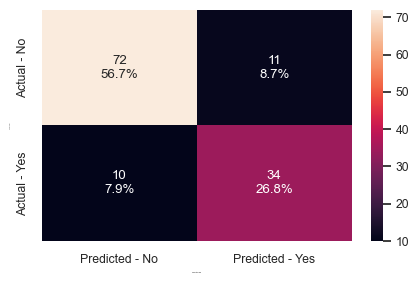

In [86]:
make_confusion_matrix(model,y_test)

In [53]:
y_train.value_counts(1)

Outcome
0    0.75
1    0.25
Name: proportion, dtype: float64

In [54]:
##  Function to calculate recall score
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [92]:
print(X_test[X_test.isin(X_train)])

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
189  NaN     NaN      NaN         NaN              NaN               NaN   
381  NaN     NaN      NaN         NaN              NaN               NaN   
120  NaN     NaN      NaN         NaN              NaN               NaN   
207  NaN     NaN      NaN         NaN              NaN               NaN   
321  NaN     NaN      NaN         NaN              NaN               NaN   
..   ...     ...      ...         ...              ...               ...   
131  NaN     NaN      NaN         NaN              NaN               NaN   
343  NaN     NaN      NaN         NaN              NaN               NaN   
356  NaN     NaN      NaN         NaN              NaN               NaN   
273  NaN     NaN      NaN         NaN              NaN               NaN   
204  NaN     NaN      NaN         NaN              NaN               NaN   

     Physical Examination  Adenopathy  Pathology  Focality  Risk   T   N   M  \
189    

In [94]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.7727272727272727


## Weirdly there is 100% recall on both the training set and test set which seems extremely strange

In [97]:
column_names = list(data.columns)
column_names.remove('Outcome')  # As this is the DV                
feature_names = column_names
print(feature_names)


['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage']


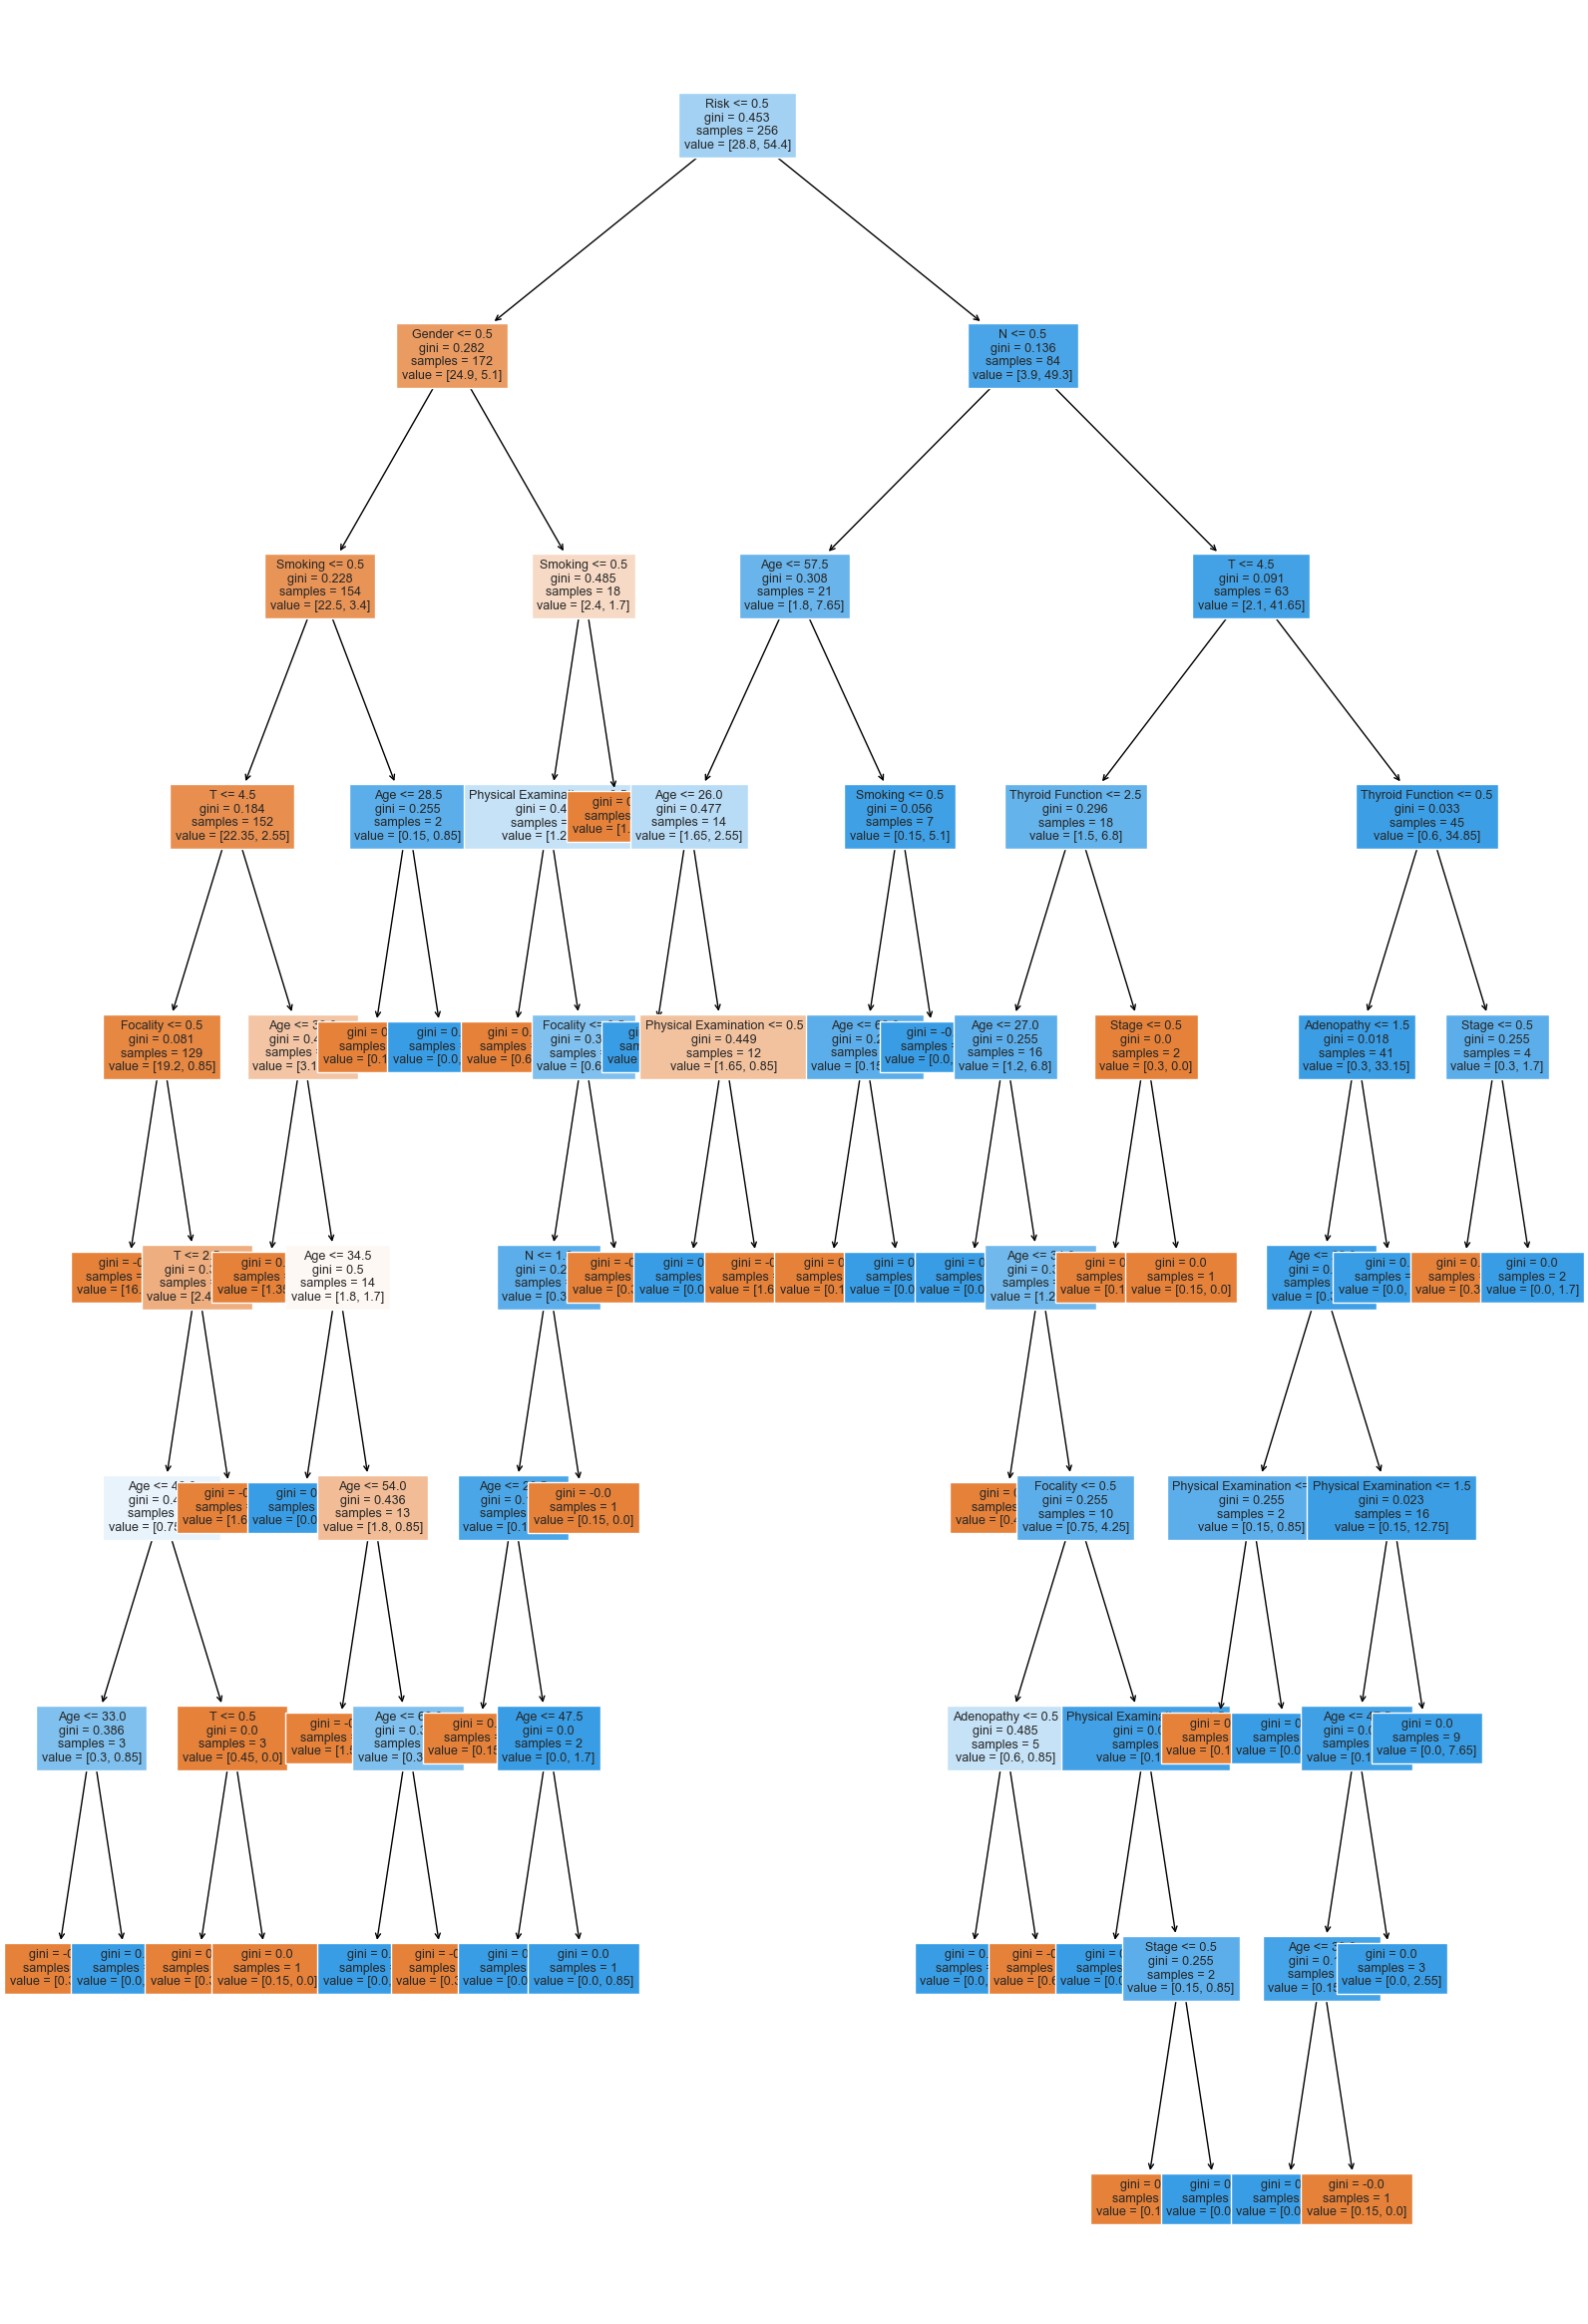

In [99]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
# Code below will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

## Graph shows that the depth is way too high as its hitting samples at 1

In [101]:
# Text report showing the rules of the decision tree

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Risk <= 0.50
|   |--- Gender <= 0.50
|   |   |--- Smoking <= 0.50
|   |   |   |--- T <= 4.50
|   |   |   |   |--- Focality <= 0.50
|   |   |   |   |   |--- weights: [16.80, 0.00] class: 0
|   |   |   |   |--- Focality >  0.50
|   |   |   |   |   |--- T <= 2.50
|   |   |   |   |   |   |--- Age <= 43.00
|   |   |   |   |   |   |   |--- Age <= 33.00
|   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  33.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |--- Age >  43.00
|   |   |   |   |   |   |   |--- T <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |--- T >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |--- T >  2.50
|   |   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- T >  4.50
|   |   |   |   |--- Age <= 33.00
|   |   |   |   |   |--- weights: [1.35, 0.0

In [102]:
# Importance of features in the tree building (The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Risk                  0.583283
Age                   0.169500
Physical Examination  0.051361
Smoking               0.044990
T                     0.041446
Focality              0.027448
Stage                 0.020312
Adenopathy            0.018879
Gender                0.015093
N                     0.014599
Thyroid Function      0.013088
Hx Smoking            0.000000
Hx Radiothreapy       0.000000
Pathology             0.000000
M                     0.000000


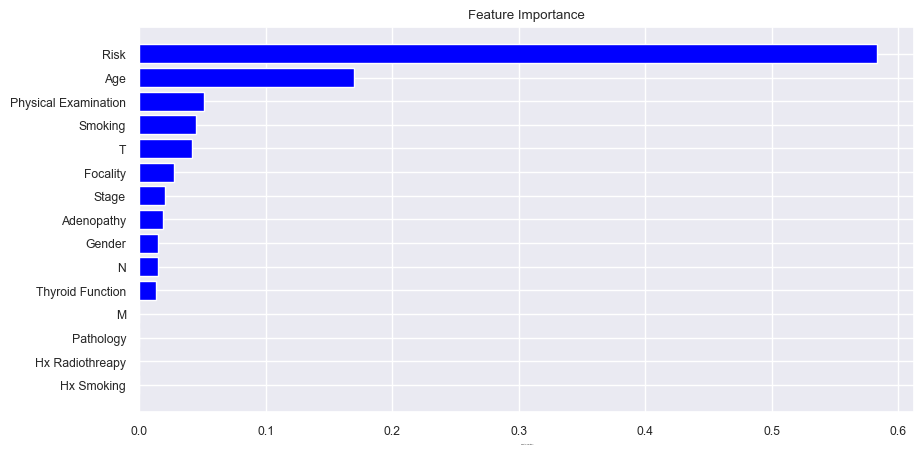

In [103]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [104]:
from sklearn.model_selection import GridSearchCV


In [105]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(15,27),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.0001,0.001,0.001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=17,
                       max_features='log2', min_impurity_decrease=0.0001,
                       random_state=1, splitter='random')

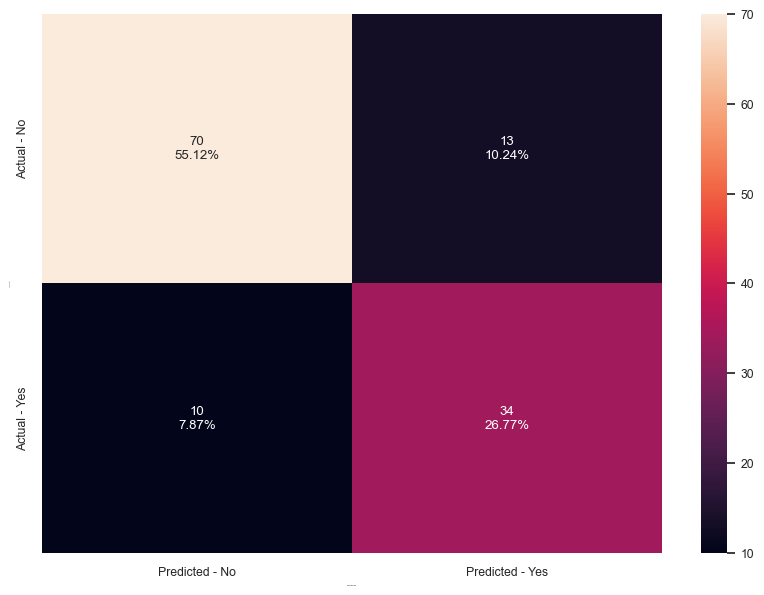

In [106]:
make_confusion_matrix(estimator,y_test)

In [107]:
get_recall_score(estimator)

Recall on training set :  0.984375
Recall on test set :  0.7727272727272727


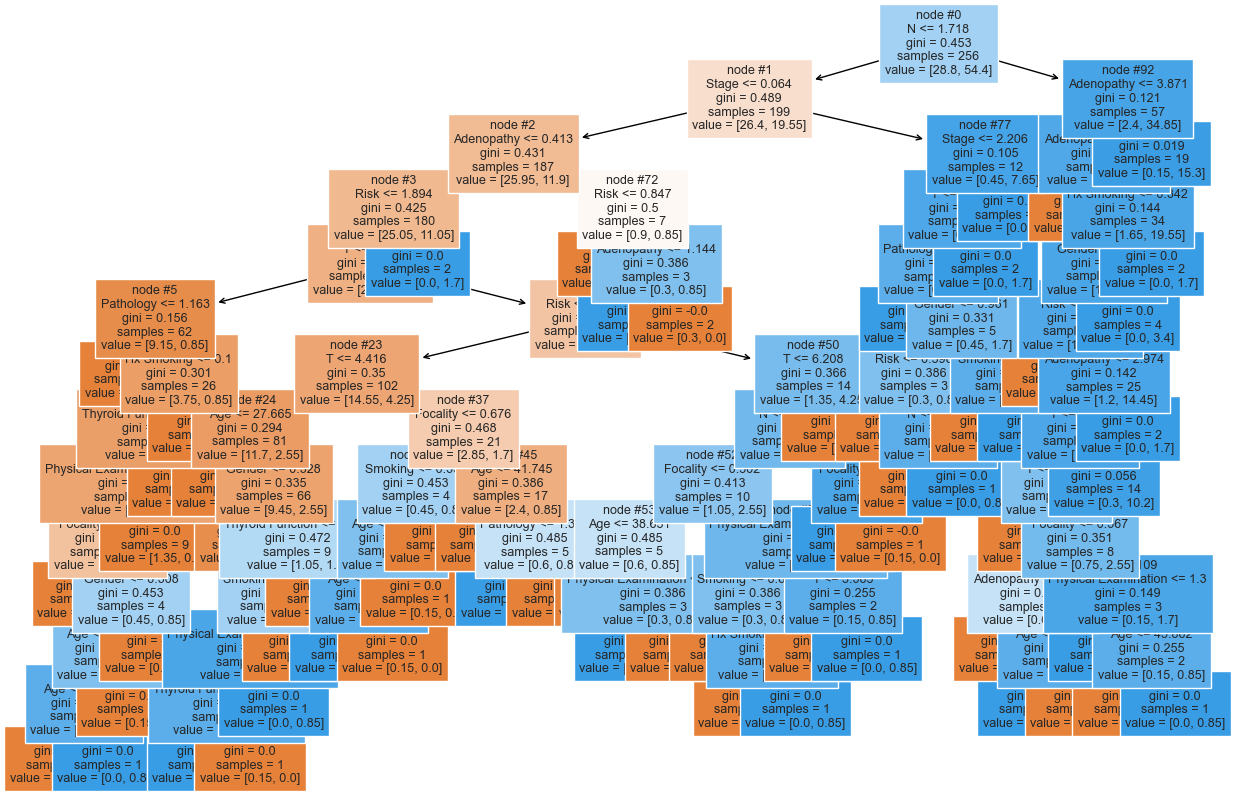

In [108]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [109]:
print(tree.export_text(estimator,feature_names=feature_names,show_weights=False))

|--- N <= 1.72
|   |--- Stage <= 0.06
|   |   |--- Adenopathy <= 0.41
|   |   |   |--- Risk <= 1.89
|   |   |   |   |--- T <= 2.01
|   |   |   |   |   |--- Pathology <= 1.16
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Pathology >  1.16
|   |   |   |   |   |   |--- Hx Smoking <= 0.10
|   |   |   |   |   |   |   |--- Thyroid Function <= 0.67
|   |   |   |   |   |   |   |   |--- Physical Examination <= 1.02
|   |   |   |   |   |   |   |   |   |--- Focality <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Focality >  0.10
|   |   |   |   |   |   |   |   |   |   |--- Gender <= 0.31
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Gender >  0.31
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Physical Examination >  1.02
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |---

In [110]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
N                     0.314145
Risk                  0.157031
Stage                 0.151351
Age                   0.067541
T                     0.061818
Adenopathy            0.061654
Smoking               0.042276
Gender                0.039486
Focality              0.038238
Pathology             0.026291
Physical Examination  0.019884
Thyroid Function      0.012114
Hx Smoking            0.008172
Hx Radiothreapy       0.000000
M                     0.000000


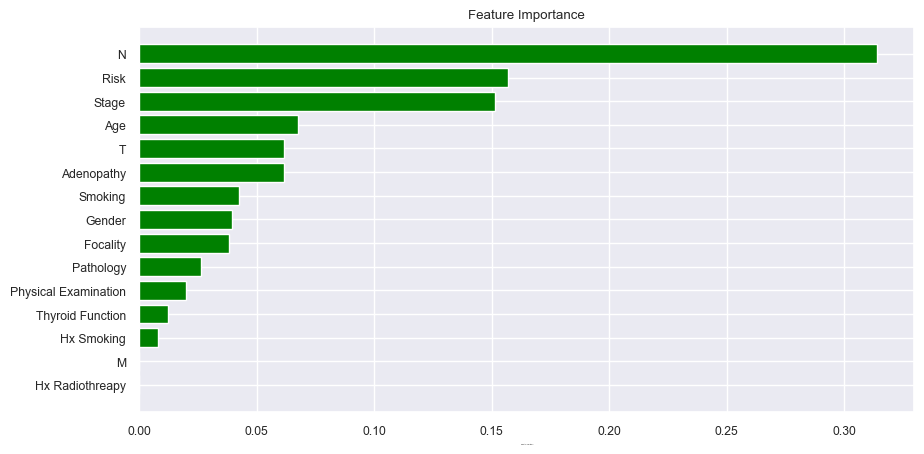

In [111]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [112]:
comparison_frame_dtree = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with Grid SearchCV'], 'Train_Recall':[1.0,0.986], 'Test_Recall':[0.974, 0.974]}) 
comparison_frame_dtree

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.000,0.974
1,Decision tree with Grid SearchCV,0.986,0.974


### This code for some reason hsa the same test recall percentage for both of the models implying are using relatively the same criteria.

##### In this case it is better to have Type II error instead of Type 1 Error
Due to the fact that it is more harmful to a person that they believe they are healthy when in reality they are not. This may cause the person to continue their lifestyle that causes hyperthyrodism or skip doctor appointments which may be crucial towards their health

# Model Evaluation Criteria

In [120]:
# Libraries for different classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [122]:
data_2=df

In [123]:
X = data_2.drop('Outcome',axis=1)
y = data_2['Outcome'] 

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# random state controls shuffling before applying split; shuffling is default; stratify allows shuffle by class
print(X_train.shape, X_test.shape)

(268, 15) (115, 15)


In [228]:
X_train.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage
85,25,0,0,1,1,0,2,0,2,0,0,1,0,0,0
58,23,0,0,0,0,1,0,0,2,0,0,1,0,0,0
349,68,1,1,1,0,4,0,4,2,1,1,6,2,0,2
224,20,1,0,0,0,0,2,1,2,0,0,4,0,0,0
242,56,1,0,0,0,0,1,0,2,0,0,4,0,0,0


In [230]:
X_test.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage
189,42,0,0,0,0,0,1,0,2,0,0,4,0,0,0
381,61,1,1,1,1,1,1,5,3,1,2,8,2,0,3
120,37,0,0,0,0,0,2,0,2,0,0,4,0,0,0
207,17,0,0,0,0,0,1,1,2,0,1,4,2,0,0
321,62,0,0,0,0,0,1,1,2,1,1,5,2,0,1


In [232]:
y_train.head()

85     0
58     0
349    1
224    1
242    1
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [234]:
y_test.head()

189    0
381    1
120    0
207    0
321    1
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [236]:
X_train.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage'],
      dtype='object')

## Decision Tree

In [239]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Parameters:
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Scoring method used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the optimal combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

In [240]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision AND F1
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returns the list with train and test scores

In [241]:
# Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy on training set :  1.0
Accuracy on test set :  0.808695652173913
Recall on training set :  1.0
Recall on test set :  0.7435897435897436
Precision on training set :  1.0
Precision on test set :  0.7073170731707317
F1-Score on training set :  1.0
F1-Score on test set :  0.725


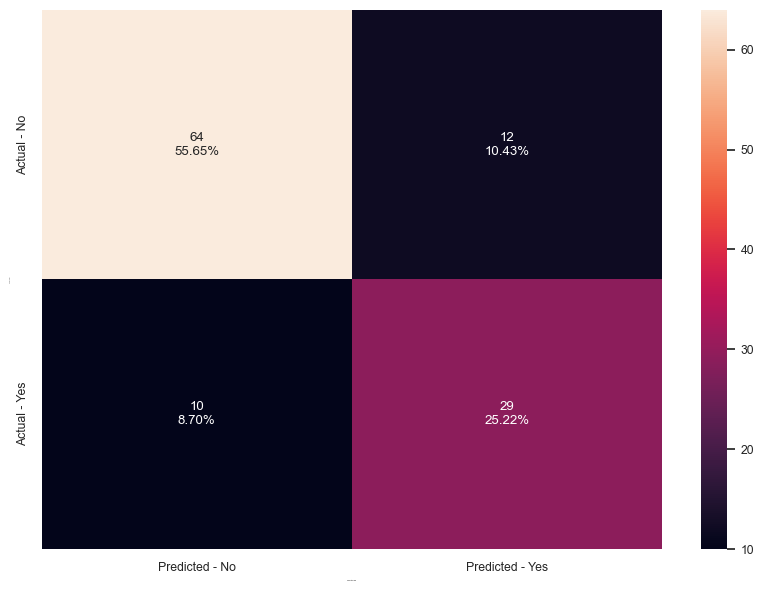

In [242]:
# Fit the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(d_tree)

# Create the confusion matrix
make_confusion_matrix(d_tree,y_test)

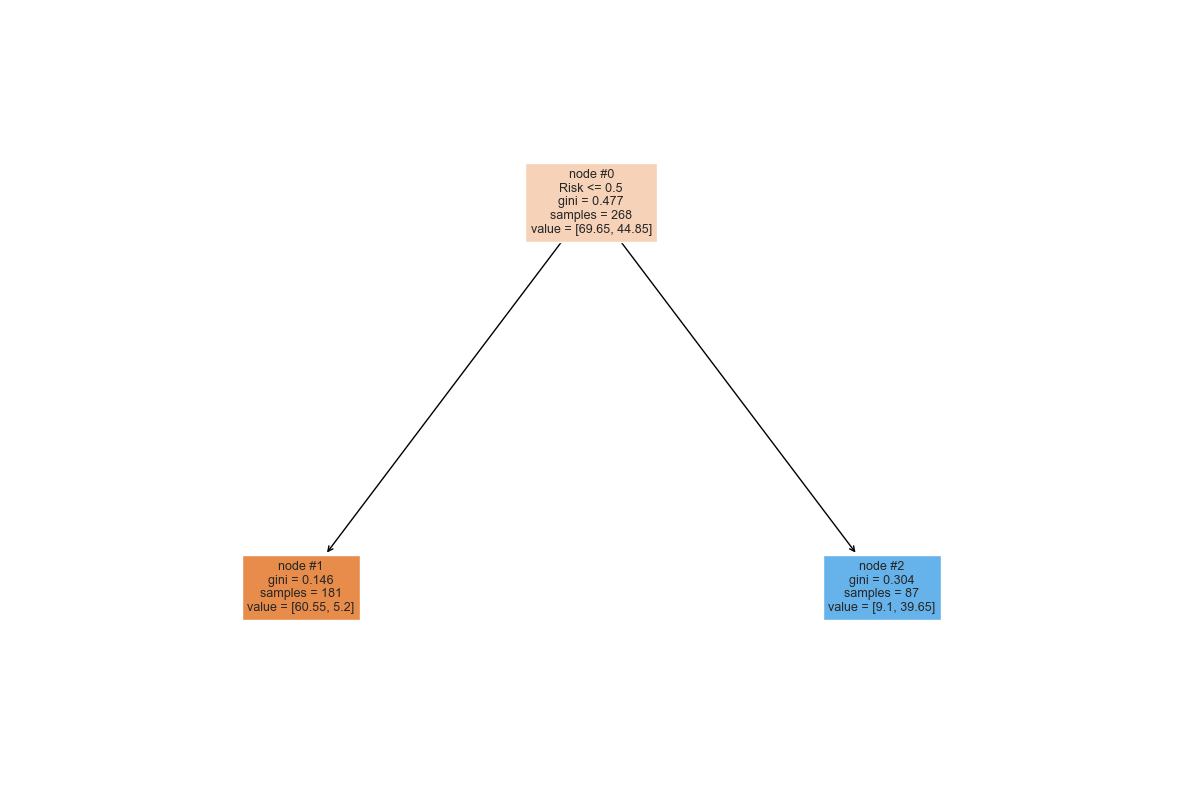

In [243]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

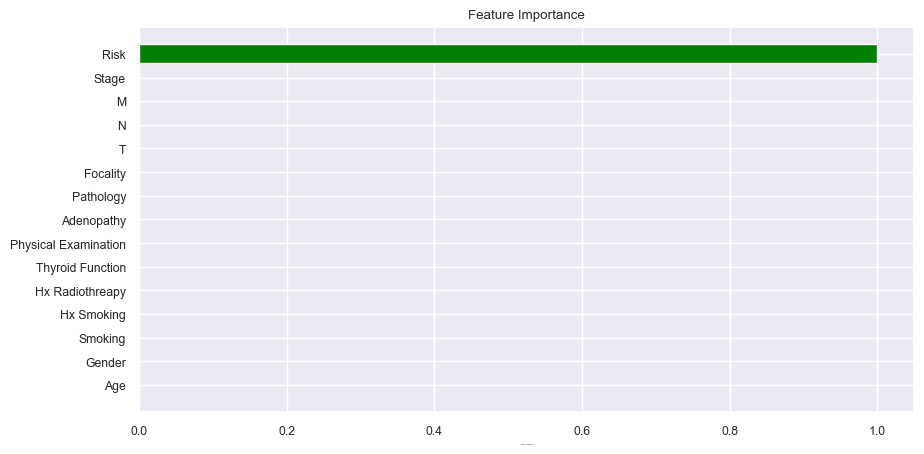

## Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.9090909090909091
Recall on training set :  1.0
Recall on test set :  0.8275862068965517
Precision on training set :  1.0
Precision on test set :  0.9230769230769231
F1-Score on training set :  1.0
F1-Score on test set :  0.8727272727272727


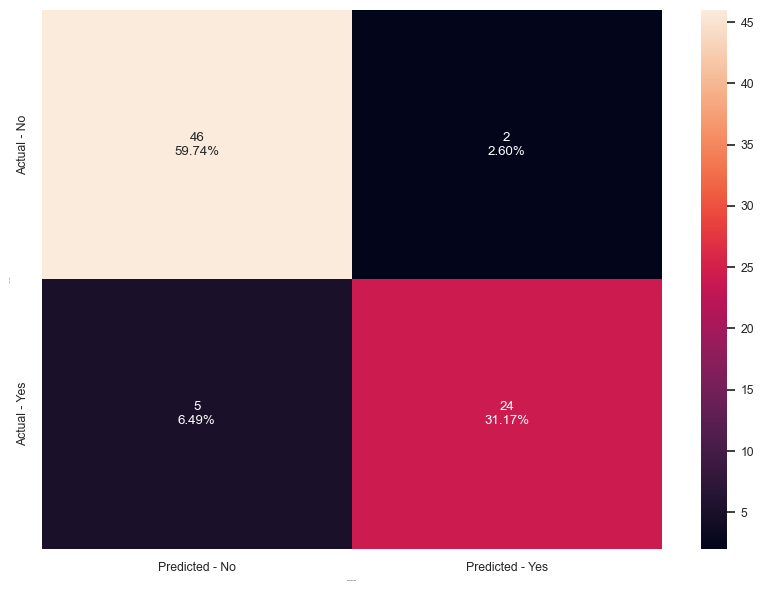

In [139]:
# Fit the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(rf_estimator)

# Create the confusion matrix
make_confusion_matrix(rf_estimator,y_test)

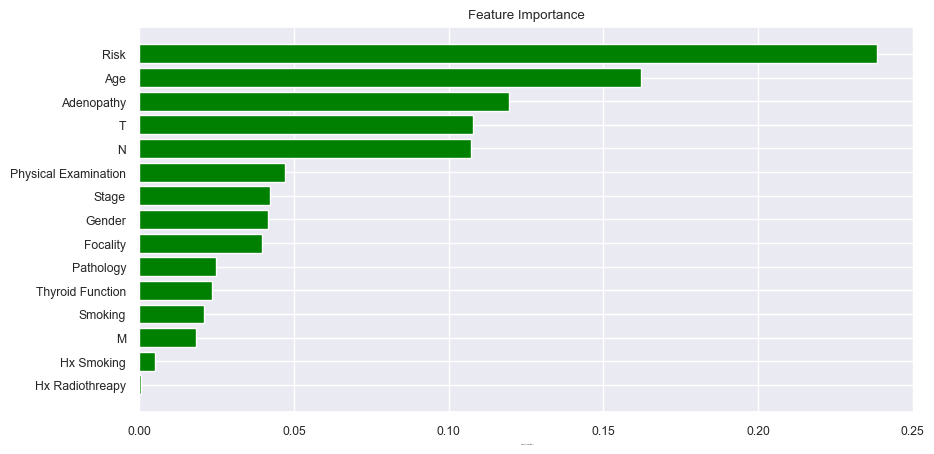

In [140]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Bagging Classifier

Accuracy on training set :  0.9901960784313726
Accuracy on test set :  0.8181818181818182
Recall on training set :  0.9746835443037974
Recall on test set :  0.7586206896551724
Precision on training set :  0.9871794871794872
Precision on test set :  0.7586206896551724
F1-Score on training set :  0.980891719745223
F1-Score on test set :  0.7586206896551724


DecisionTreeClassifier()

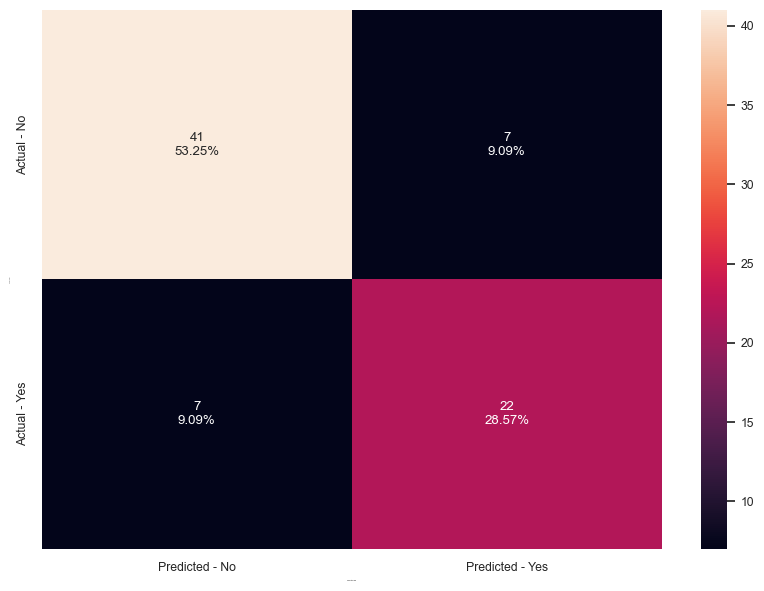

In [162]:
# Fit the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(bagging_classifier)

# Create the confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

# Classifier
bg_estimator = bagging_classifier.estimator_
bg_estimator.fit(X_train,y_train)

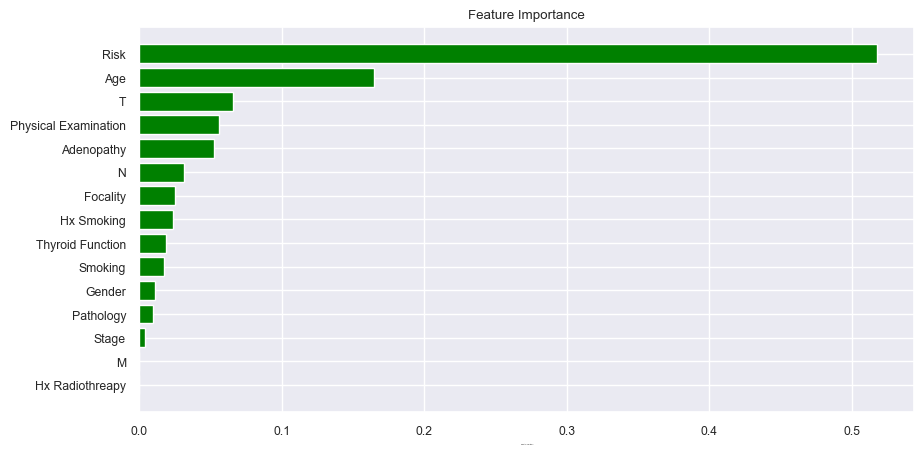

In [164]:
importances = bg_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Tuned Decision Tree

In [208]:
%%time
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train)


CPU times: total: 1.42 s
Wall time: 4.6 s


DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Accuracy on training set :  0.869281045751634
Accuracy on test set :  0.8701298701298701
Recall on training set :  0.8734177215189873
Recall on test set :  0.9310344827586207
Precision on training set :  0.696969696969697
Precision on test set :  0.7714285714285715
F1-Score on training set :  0.7752808988764046
F1-Score on test set :  0.8437500000000001


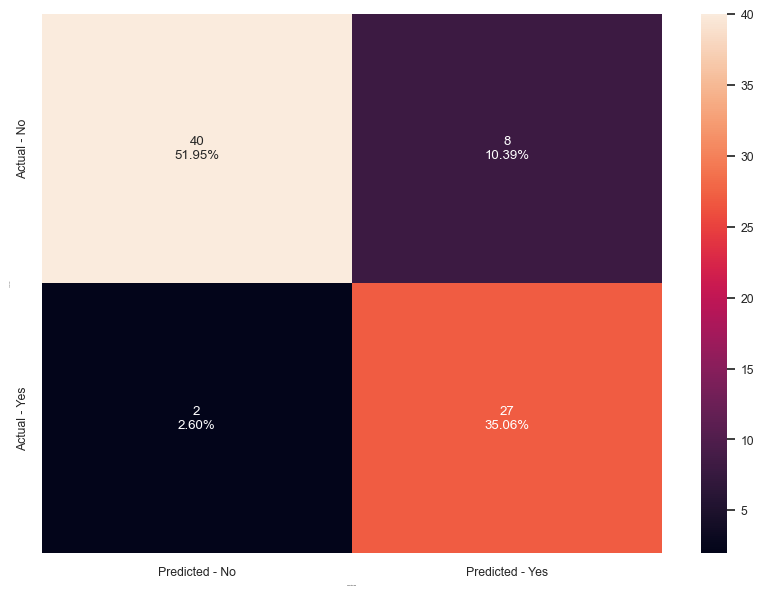

In [209]:
get_metrics_score(dtree_tuned)

make_confusion_matrix(dtree_tuned,y_test)

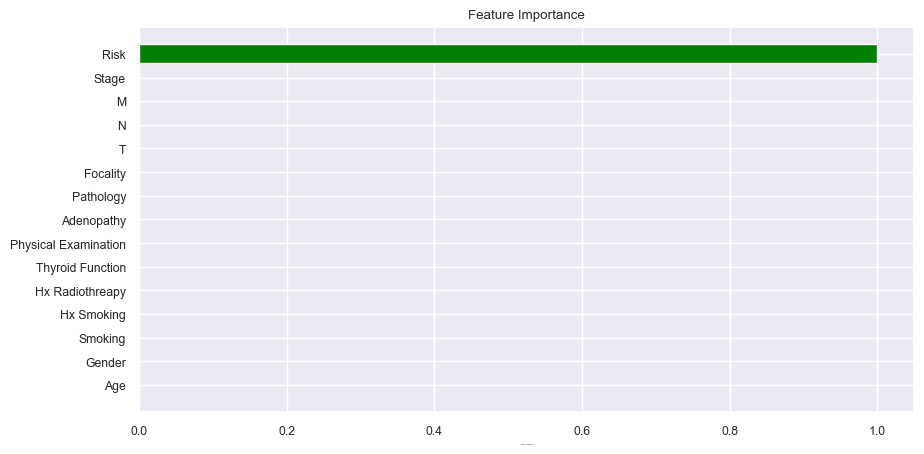

In [210]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Tuned Random Forest 

In [214]:
%%time 
# captures time it takes to run this block of code

# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)


rf2_estimator = rf_tuned.estimator_
rf2_estimator.fit(X_train,y_train)

C:\Users\1078620\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
39200 fits failed out of a total of 117600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\1078620\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\1078620\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\1078620\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validat

CPU times: total: 1min 59s
Wall time: 47min 38s


C:\Users\1078620\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.785 0.785 0.785 ...   nan   nan   nan]
  warnings.warn(


DecisionTreeClassifier()

Accuracy on training set :  0.869281045751634
Accuracy on test set :  0.8701298701298701
Recall on training set :  0.8734177215189873
Recall on test set :  0.9310344827586207
Precision on training set :  0.696969696969697
Precision on test set :  0.7714285714285715
F1-Score on training set :  0.7752808988764046
F1-Score on test set :  0.8437500000000001


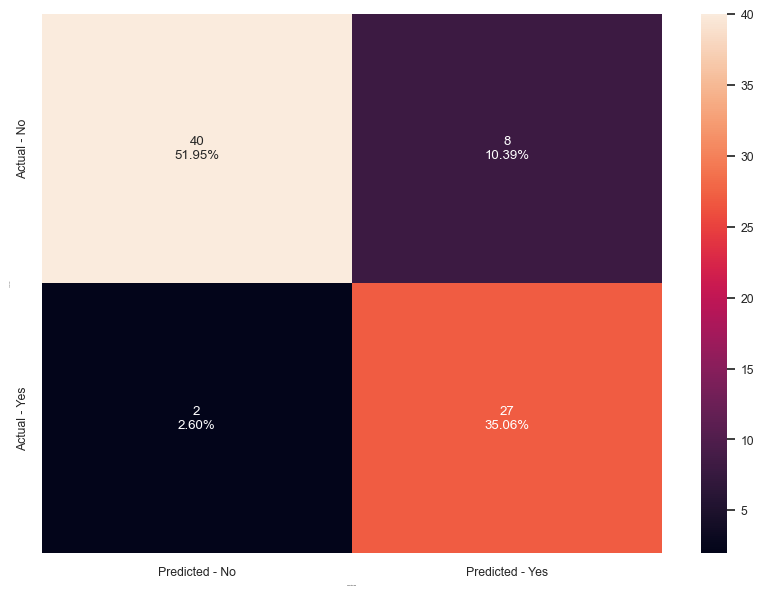

In [215]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

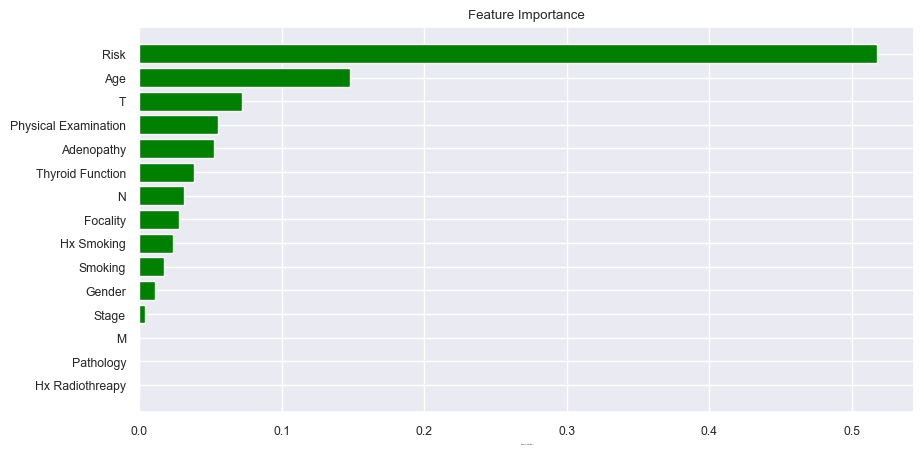

In [216]:
importances = rf2_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Tuned Bagging Classifier

In [190]:
%%time
bagging_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
bagging_tuned = grid_obj.best_estimator_

bagging_tuned.fit(X_train, y_train)
bgt_estimator = bagging_tuned.estimator_
bgt_estimator.fit(X_train,y_train)

CPU times: total: 11.6 s
Wall time: 17.2 s


DecisionTreeClassifier()

Accuracy on training set :  0.9934640522875817
Accuracy on test set :  0.8961038961038961
Recall on training set :  0.9746835443037974
Recall on test set :  0.896551724137931
Precision on training set :  1.0
Precision on test set :  0.8387096774193549
F1-Score on training set :  0.9871794871794872
F1-Score on test set :  0.8666666666666666


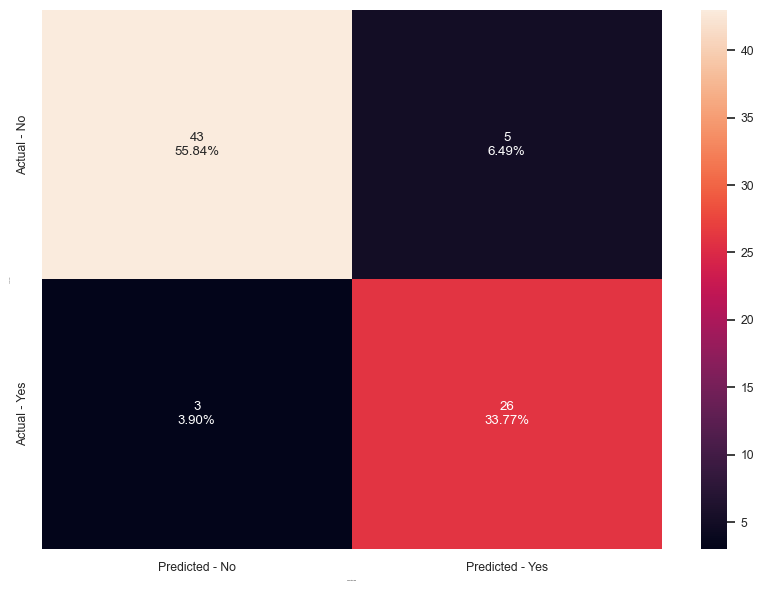

In [191]:
get_metrics_score(bagging_tuned)

make_confusion_matrix(bagging_tuned,y_test)

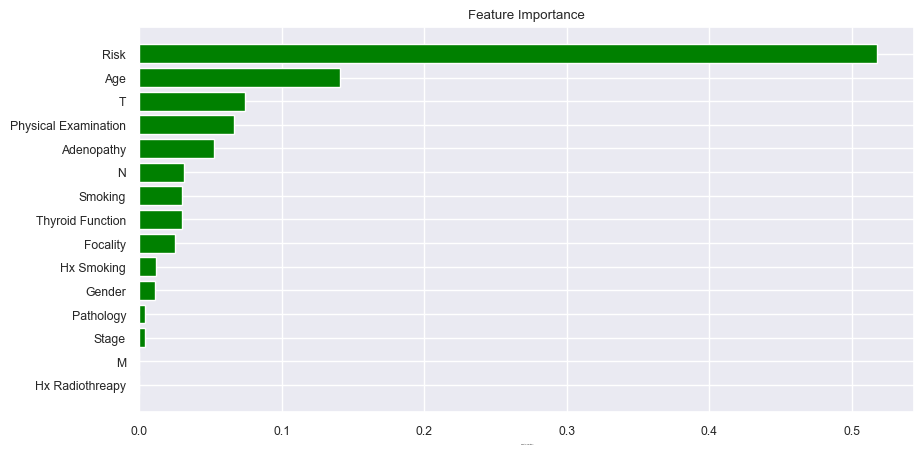

In [192]:
importances = bgt_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparison

In [251]:
# Identify the models to compare
models = [d_tree, dtree_tuned, rf_estimator, bagging_classifier, bagging_tuned]

# Define empty lists to add results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall, Precision, and F1)
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [253]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest',
                                          'Bagging Classifier','Tuned Bagging Classifier'], 'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test, 'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'F1_Train':f1_train, 'F1_Test':f1_test})

#Sort models in decreasing order of test recall
comparison_frame.sort_values(by='F1_Test',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,F1_Train,F1_Test
2,Random Forest,1.000000,0.939130,1.000000,0.871795,1.000000,0.944444,1.000000,0.906667
4,Tuned Bagging Classifier,0.992537,0.930435,0.971014,0.923077,1.000000,0.878049,0.985294,0.900000
3,Bagging Classifier,0.988806,0.878261,0.971014,0.820513,0.985294,0.820513,0.978102,0.820513
1,Tuned Decision Tree,0.873134,0.860870,0.884058,0.897436,0.701149,0.744681,0.782051,0.813953
0,Decision Tree,1.000000,0.808696,1.000000,0.743590,1.000000,0.707317,1.000000,0.725000


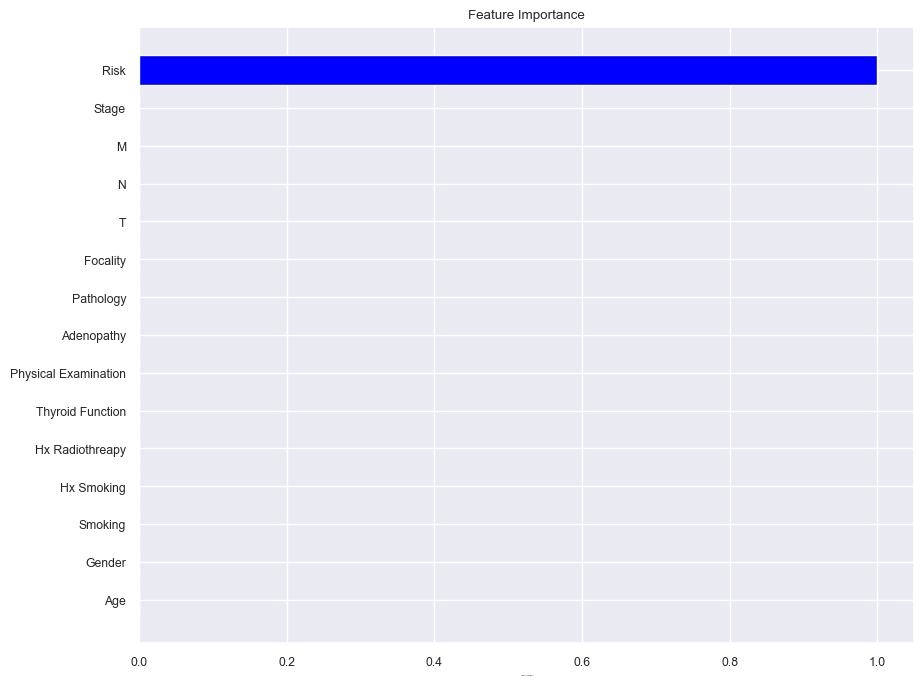

In [255]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [257]:
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Relative Importance"], index = X_train.columns).sort_values(by = 'Relative Importance', ascending = False))


                      Relative Importance
Risk                                  1.0
Age                                   0.0
Gender                                0.0
Smoking                               0.0
Hx Smoking                            0.0
Hx Radiothreapy                       0.0
Thyroid Function                      0.0
Physical Examination                  0.0
Adenopathy                            0.0
Pathology                             0.0
Focality                              0.0
T                                     0.0
N                                     0.0
M                                     0.0
Stage                                 0.0


In [ ]:
plt.hist(by='F1_Test',ascending=False)

## Extra Plots to Visualize 

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape)

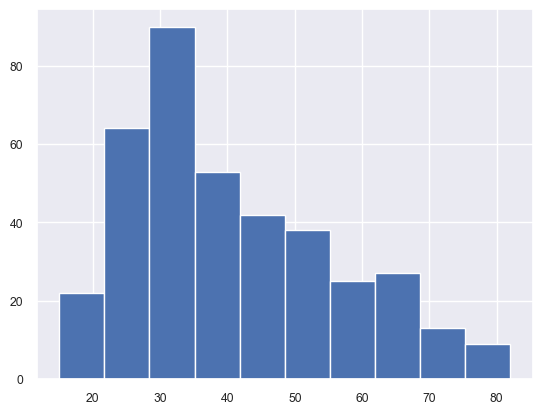

In [88]:
plt.hist(df['Age'], color='b');

C:\Users\1078620\AppData\Local\Temp\ipykernel_21612\799727481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], color='r', rug=True);


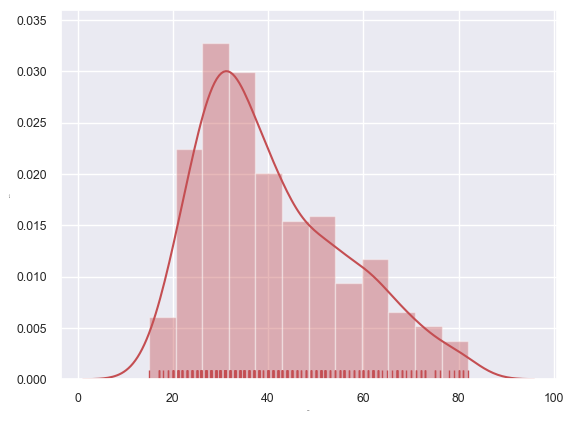

In [90]:
sns.distplot(df['Age'], color='r', rug=True);

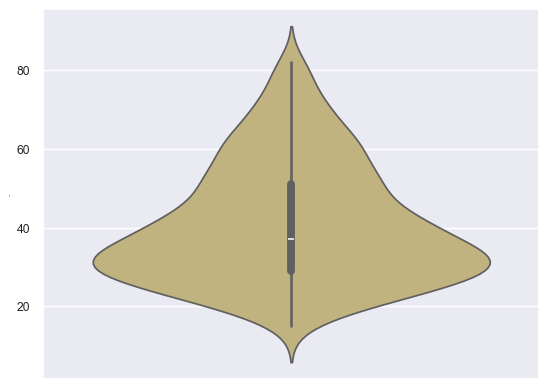

In [92]:
sns.violinplot(df['Age'],color='y');

In [ ]:
sns.pairplot(df);

In [ ]:
# Plot histograms to check the distribution of each numeric variable
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    
plt.show()

In [95]:


import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [99]:
X = data.drop('Outcome',axis=1)    # Features
y = data['Outcome'].astype('int64') # Labels (Target or Outcome Variable)
# converting target to integers - since some functions might not work with bool type

## ROC Curve

In [186]:
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   383 non-null    int64   
 1   Gender                383 non-null    int64   
 2   Smoking               383 non-null    int64   
 3   Hx Smoking            383 non-null    int64   
 4   Hx Radiothreapy       383 non-null    int64   
 5   Thyroid Function      383 non-null    int64   
 6   Physical Examination  383 non-null    int64   
 7   Adenopathy            383 non-null    int64   
 8   Pathology             383 non-null    int64   
 9   Focality              383 non-null    int64   
 10  Risk                  383 non-null    int64   
 11  T                     383 non-null    int64   
 12  N                     383 non-null    int64   
 13  M                     383 non-null    int64   
 14  Stage                 383 non-null    int64   
 15  Patien

In [205]:
X = data.drop('Outcome',axis=1)    # Features
y = data['Outcome'].astype('int64') # Labels (Target or Outcome Variable)
# converting target to integers - since some functions might not work with bool type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [211]:

# Train a logistic regression model
model = LogisticRegression() 
model.fit(X_train, y_train)
# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[0:, 1]

C:\Users\1078620\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

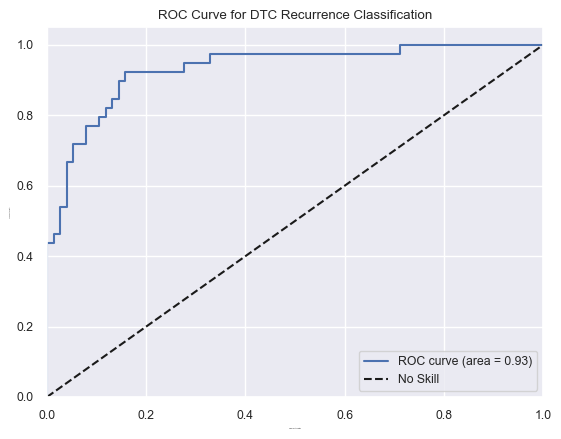

In [215]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DTC Recurrence Classification')
plt.legend()
plt.show()

# Logistic Regression and SVM

In [218]:
# Import libraries and upload data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import warnings

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings("ignore")

In [220]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)

In [222]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty=None,verbose=True,n_jobs=-1,random_state=0)

logreg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty=None, random_state=0,
                   solver='newton-cg', verbose=True)

In [224]:
from sklearn.metrics import classification_report,confusion_matrix


def make_confusion_matrix(y_actual,y_predict,labels=[0, 1]):
    '''
    y_predict: class prediction
    y_actual: actual truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ['0','1']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [226]:
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: class prediction
    y_actual: actual truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["1","0"]])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [228]:
# Fit the model on training data
model = LogisticRegression(solver="liblinear") 
model.fit(X_train, y_train)

# Predict on test data
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df) # Note: Logistic regression coefficients are difficult to interpret
model_score = model.score(X_test, y_test)
print(model_score)

          0         1         2         3         4         5         6  \
0 -0.002582  1.051696 -0.184686  0.445992 -0.005919 -0.569705 -0.105835   

         7         8         9        10        11        12        13  \
0  0.28278 -0.483057  0.431121  1.542422  0.073258  0.525235  0.709751   

         14        15  intercept  
0  0.921515 -0.523798  -0.936842  
0.9043478260869565


In [230]:
# To get model score alone, use this code:
model_score = model.score(X_test, y_test)
print(model_score)

0.9043478260869565


Confusion Matrix for Train Set 



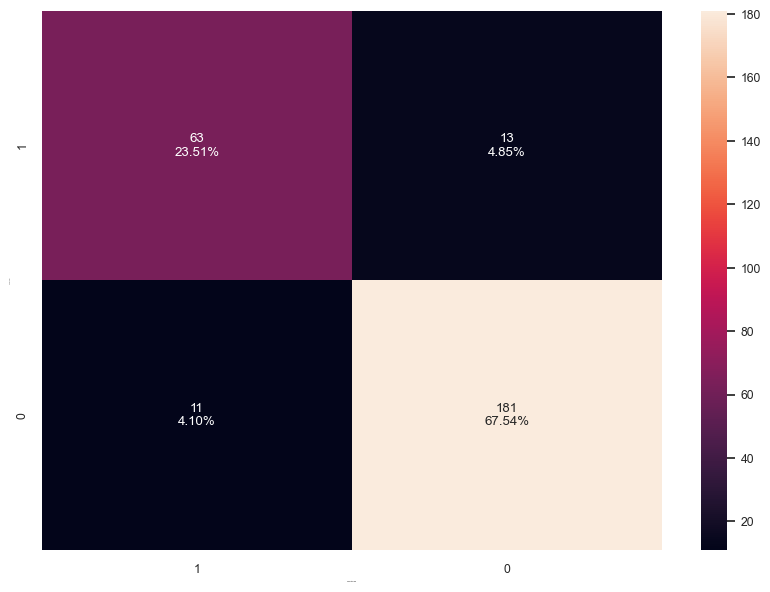

In [232]:
# Confusion matrix for TRAIN set
print("Confusion Matrix for Train Set \n")
make_confusion_matrix(y_train,pred_train)

Confusion Matrix for Test Set: 



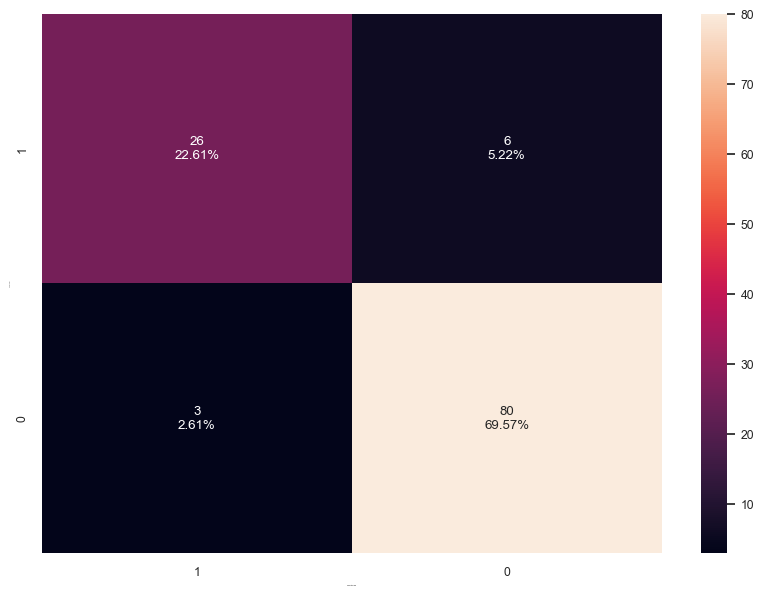

In [234]:
# Prediction for TEST set
pred_test = logreg.predict(X_test)

print("Confusion Matrix for Test Set: \n")
make_confusion_matrix(y_test,pred_test)

In [236]:
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

Accuracy on train data: 0.9104477611940298
Accuracy on test data: 0.9217391304347826


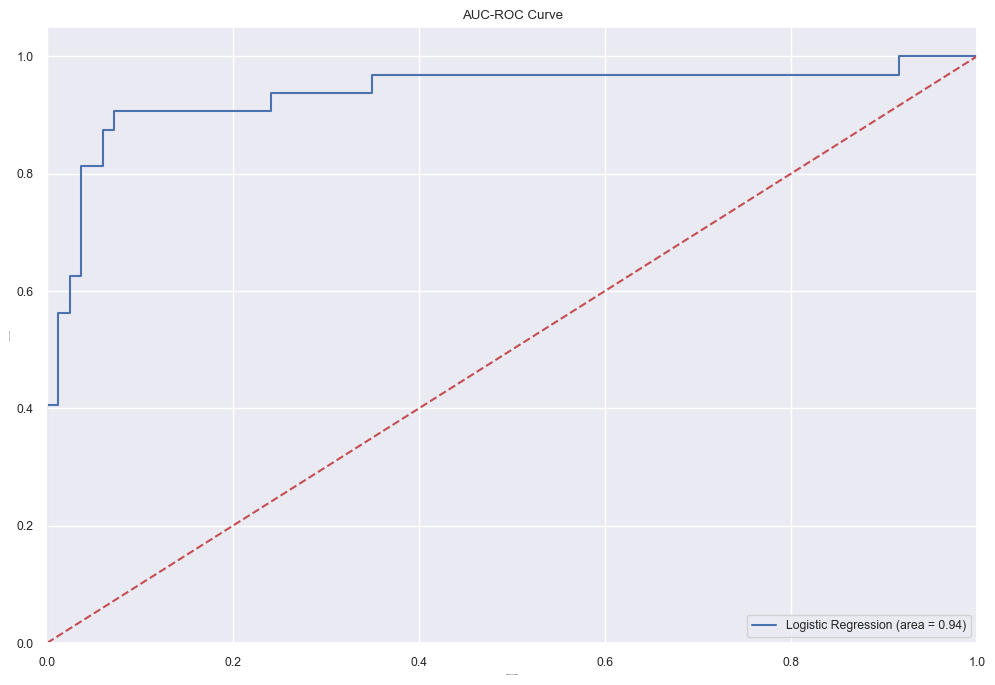

In [238]:
# AUC-ROC curve code
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [240]:
# The optimal cut off would be where true positive rate is high and false positive rate is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.30321309515712946


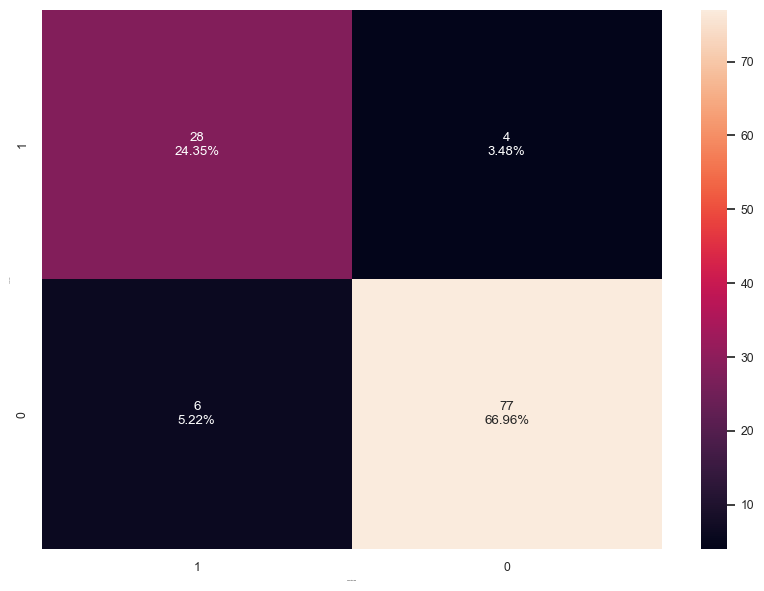

In [244]:
make_confusion_matrix(y_test,y_pred_ts)


In [246]:
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))

Accuracy on train data: 0.8992537313432836
Accuracy on test data: 0.9130434782608695


In [242]:
target_names = ['0', '1']
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

In [248]:
num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [250]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('VIF series before feature selection: \n\n{}\n'.format(vif_series1))

VIF series before feature selection: 

const                   31.119328
Age                      1.568767
Gender                   1.725072
Smoking                  1.967209
Hx Smoking               1.181563
Hx Radiothreapy          1.412419
Thyroid Function         1.035988
Physical Examination     1.105280
Adenopathy               2.554911
Pathology                1.834340
Focality                 1.394808
Risk                     3.859840
T                        2.657868
N                        3.278984
M                        2.149913
Stage                    3.507495
Patient Response         1.565467
dtype: float64



In [252]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, y, test_size=0.30)


In [254]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

         Current function value: 0.195314
         Iterations: 35


In [256]:
print(lg.summary())


                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  268
Model:                          Logit   Df Residuals:                      251
Method:                           MLE   Df Model:                           16
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.6622
Time:                        21:51:27   Log-Likelihood:                -52.344
converged:                      False   LL-Null:                       -154.94
Covariance Type:            nonrobust   LLR p-value:                 7.043e-35
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.2192      1.667     -1.932      0.053      -6.485       0.047
Age                      0.0027      0.027      0.100      0.920      -0.051       0.056
Gender      

In [258]:
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [260]:
# Filter by significant p-values (<0.05) and sort descending by OR estimate
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<0.05
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Risk,1.77,5.86,0.85,0.02
Patient Response,-0.54,0.58,0.37,0.00
Thyroid Function,-0.80,0.45,0.31,0.02


In [262]:
pval_filter = lgcoef['pval']<=0.01
imp_vars = lgcoef[pval_filter].index.tolist()

sig_var = []
for col in imp_vars:
    if '_' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print('Most significant variables category-wise:\n',lgcoef[pval_filter].index.tolist())
print('*'*120)

Most significant variables category-wise:
 ['Patient Response']
************************************************************************************************************************


In [264]:
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [268]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')  # You can choose other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [270]:
y_pred = svm_model.predict(X_test)


In [272]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

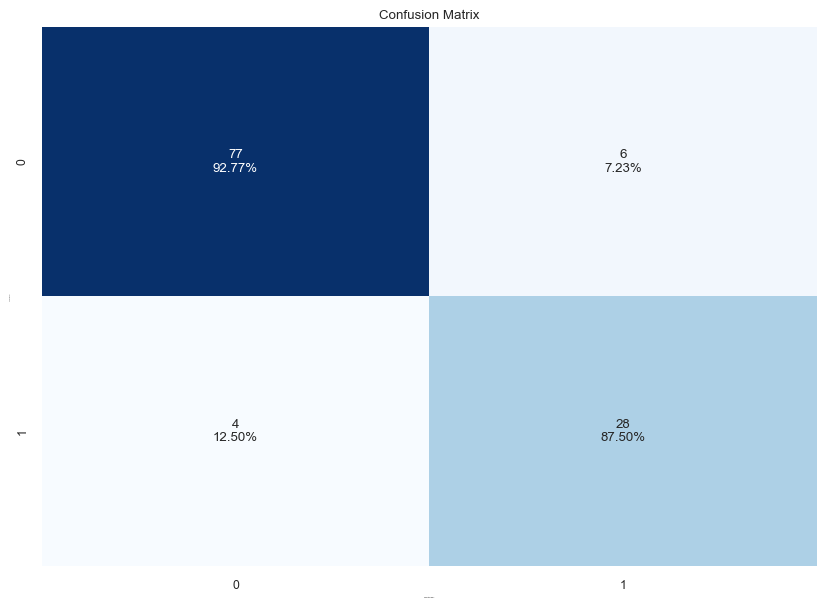

In [274]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
conf_matrix_combined = np.array([["{}\n{:.2f}%".format(value, percent) for value, percent in zip(row_counts, row_percents)]
                                 for row_counts, row_percents in zip(conf_matrix, conf_matrix_percent)])

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=conf_matrix_combined, fmt='', cmap='Blues', cbar=False, xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Citations
Borzooei,Shiva and Tarokhian,Aidin. (2023). Differentiated Thyroid Cancer Recurrence. UCI Machine Learning Repository. https://doi.org/10.24432/C5632J. <br>
Fairclough, Jamie (2024). Sample Notebook - Diabetes Prediction - ML ONLY. Stanford Pre-Collegiate Studies. https://spcs-programs.instructure.com/courses/841 <br>
Fairclough, Jamie (2024). 
Logistic Regression & SVM.html. Stanford Pre-Collegiate Studies. https://spcs-programs.instructure.com/courses/841